<img src="hogwarts_night.jpg" alt="Resized Hogwarts Castle" width="1000" height="300">

# Importing the needed packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import IPython.display as display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import KFold, RepeatedKFold,RepeatedStratifiedKFold, StratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Importing the datasets

In [2]:
train = pd.read_csv('Project_train_dataset.csv')
test = pd.read_csv('Project_test_dataset.csv')

# Initial Visualizations

In [3]:
train.head()

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
0,1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
1,2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
2,3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
3,5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
4,6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                713 non-null    int64  
 1   Program                   713 non-null    object 
 2   Student Gender            713 non-null    object 
 3   Experience Level          567 non-null    float64
 4   Student Siblings          713 non-null    int64  
 5   Student Family            713 non-null    int64  
 6   Financial Background      713 non-null    float64
 7   School Dormitory          153 non-null    object 
 8   School of Origin          713 non-null    object 
 9   Student Social Influence  713 non-null    int64  
 10  Favourite Study Element   713 non-null    object 
 11  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


In [5]:
train.isnull().sum()

Student ID                    0
Program                       0
Student Gender                0
Experience Level            146
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            560
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
Admitted in School            0
dtype: int64

In [6]:
#We have 146 missing values in the column Experience Level
#We have 560 missing values in the column School Dormitory

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,713.0,443.402525,257.180421,1.00,219.000,446.0,666.0,889.0000
Experience Level,567.0,29.890952,14.599272,0.42,20.750,28.0,39.0,80.0000
Student Siblings,713.0,0.521739,1.057287,0.00,0.000,0.0,1.0,8.0000
Student Family,713.0,0.354839,0.770985,0.00,0.000,0.0,0.0,6.0000
Financial Background,713.0,31.327238,50.903034,0.00,7.925,14.4,30.0,512.3292
Student Social Influence,713.0,12.719495,6.949648,1.00,7.000,13.0,19.0,24.0000
Admitted in School,713.0,0.353436,0.478372,0.00,0.000,0.0,1.0,1.0000


In [8]:
train.describe(include='O').T

,count,unique,top,freq
Program,713,3,Sorcery School,391
Student Gender,713,2,male,469
School Dormitory,153,6,Mystical Chamber,51
School of Origin,713,3,Mystic Academy,524
Favourite Study Element,713,4,Earth,184


### Target variable

In [9]:
train['Admitted in School'].value_counts()

Admitted in School
0    461
1    252
Name: count, dtype: int64

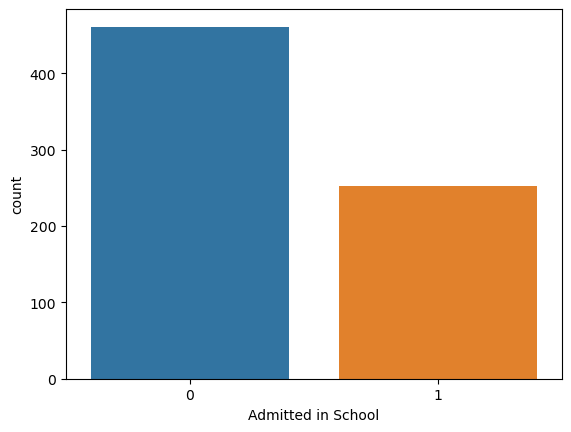

In [10]:
sns.countplot(x= 'Admitted in School', data=train)
plt.show()

In [11]:
#We have an unbalanced dataset (more 0 than ones in our case)

### Setting the index

In [12]:
duplicated= train.duplicated(subset='Student ID', keep=False)
train[duplicated]

,Student ID,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School


In [13]:
#We don't have any duplicates in 'Student ID' and since this variable doesn't give us any additional information in terms of predicting, we will set it has the index
train.set_index('Student ID', drop=True, inplace=True)
train.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


### Splitting into the independent and the dependent variables

In [14]:
data= train.iloc[:,:-1]
target= train.iloc[:,-1]

In [15]:
data_numerical= data.select_dtypes(include=np.number)
data_categorical= data.select_dtypes(exclude=np.number)

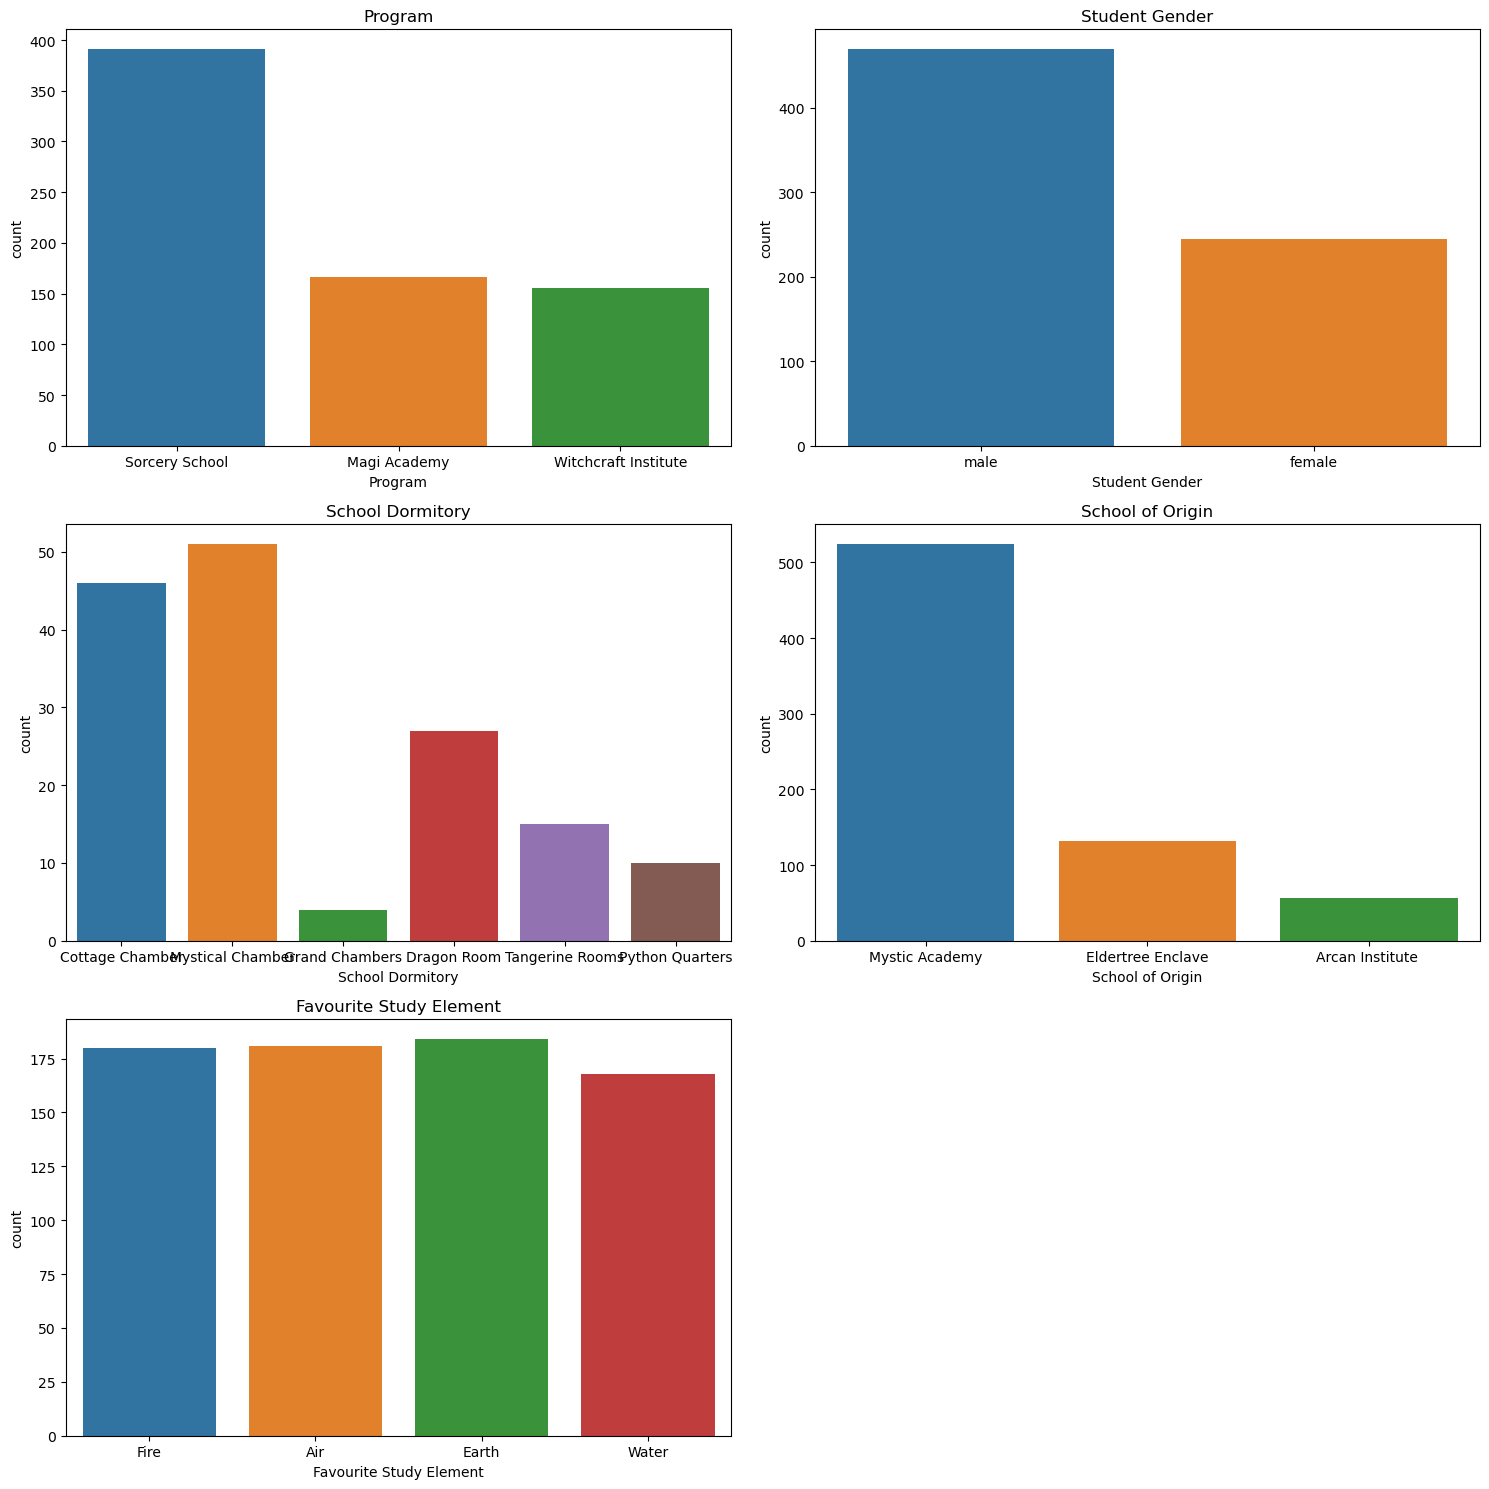

In [16]:
#Categorical variables
fig, axes= plt.subplots(3,2, figsize=(15,15))
axes = axes.flatten()
for i, column in enumerate(data_categorical.columns):
    sns.countplot(x= column, data=data_categorical, ax=axes[i])
    axes[i].set_title(column)
axes[-1].axis('off')
plt.tight_layout()
plt.show()


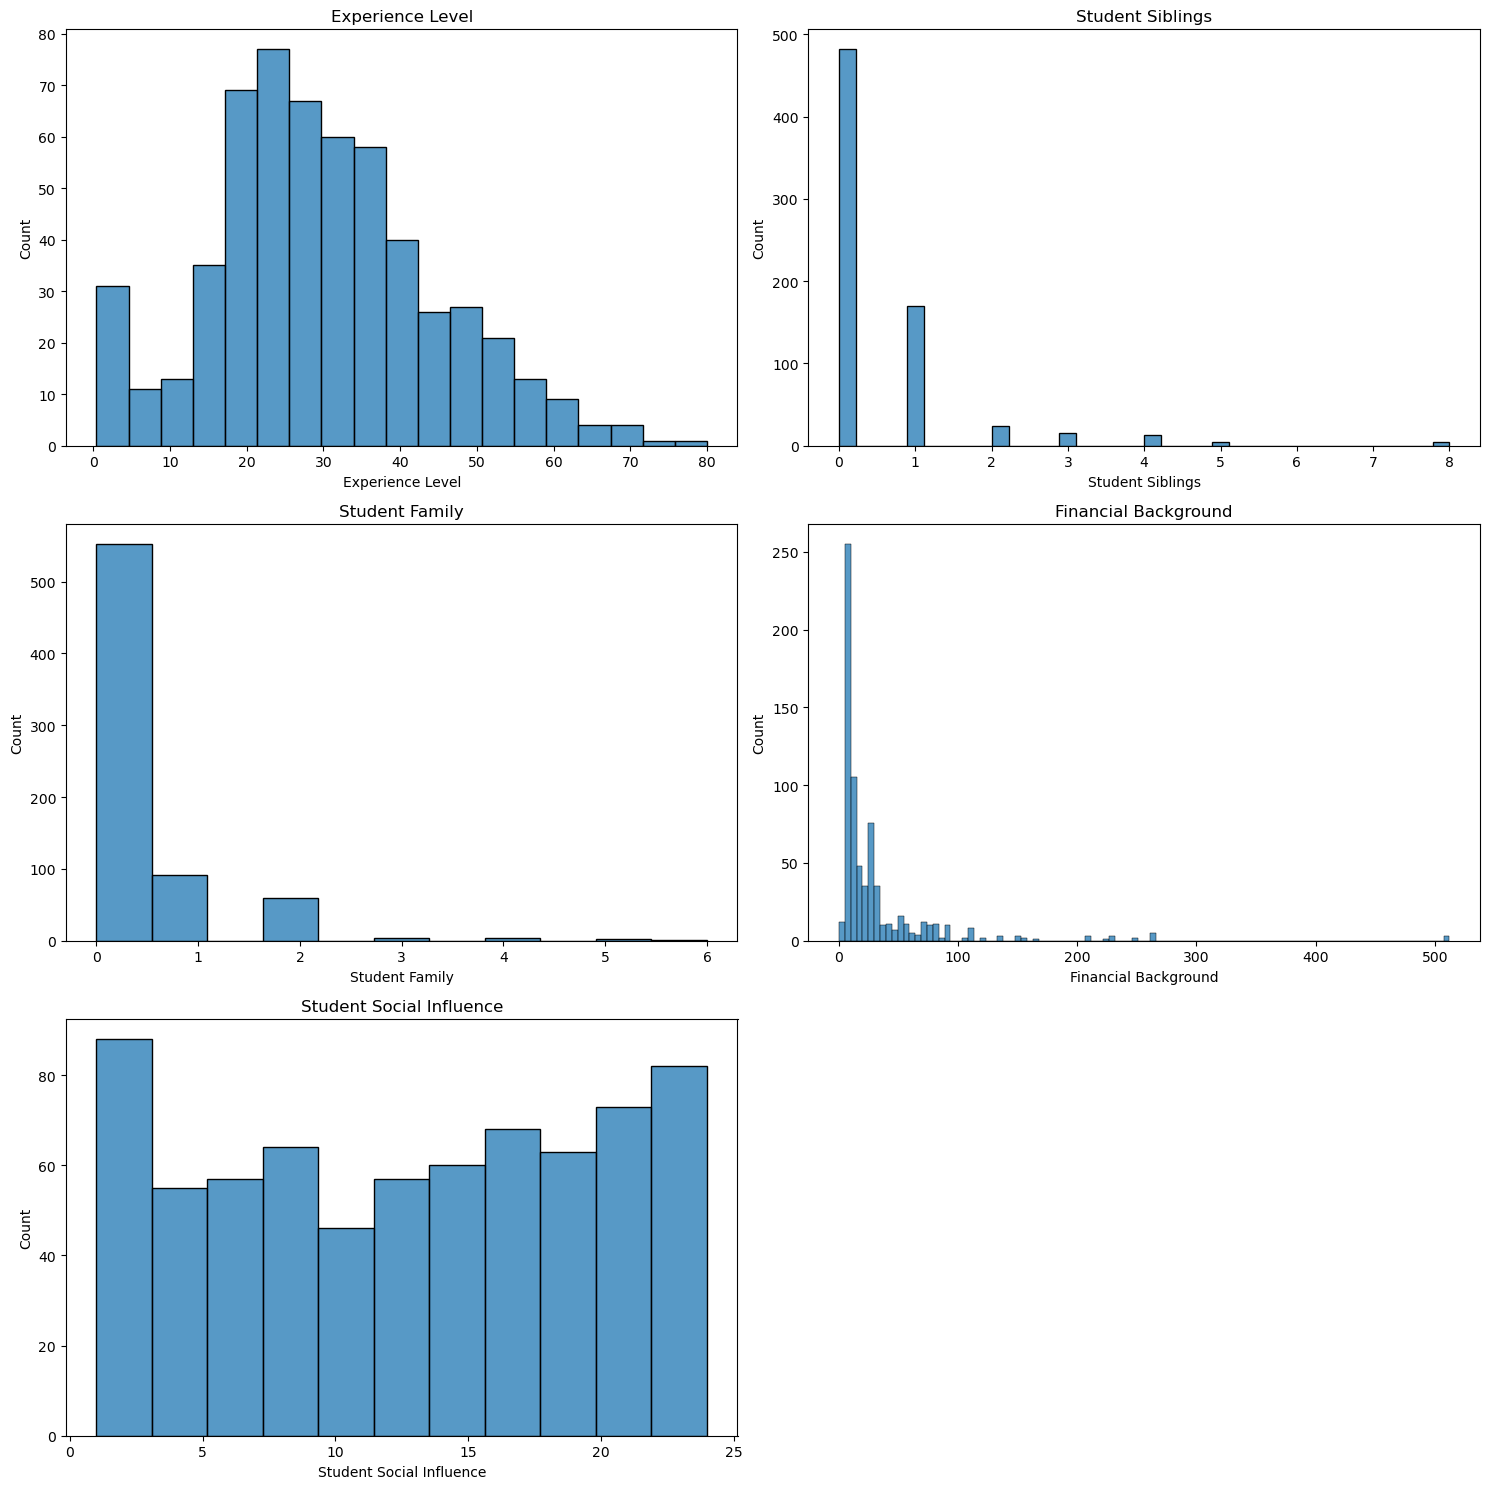

In [17]:
#Numerical variables
fig, axes= plt.subplots(3,2, figsize=(15,15))
axes = axes.flatten()
for i, column in enumerate(data_numerical.columns):
    sns.histplot(x= column, data=data_numerical, ax=axes[i])
    axes[i].set_title(column)
axes[-1].axis('off')
plt.tight_layout()
plt.show()

In [18]:
#We have 560 missing values and only 153 filled values in the colummn School Dormitory
train.drop('School Dormitory', axis=1, inplace=True)
#We drop the varible because if we transform those missing values to 'none', we will have almost a contand colunm 

## Outliers Removal

In this step, we will handle outliers in three of the numerical variables. For the "Financial Background" variable we will establish an upper limit of 200 and any observation with a value higher than 200 will be removed, this will result in the removal of 17 observations (2.38% of dataset). For the "Student Siblings" and "Student Family", we will define upper limits where any value above this limit is replaced by the limit. These limits are 4 for "Student Siblings" and 3 for "Student Family". Considering someone that has 4 or more siblins as having 'many siblins', and someone that has 3 or more persons in the school as having 'many persons in the school'.


In [19]:
train.loc[train['Student Siblings'] > 4,'Student Siblings'] = 4
train.loc[train['Student Family'] > 3,'Student Family'] = 3

In [20]:
train['Student Siblings'].value_counts()

Student Siblings
0    482
1    170
2     24
4     22
3     15
Name: count, dtype: int64

In [21]:
train['Student Family'].value_counts()

Student Family
0    552
1     91
2     59
3     11
Name: count, dtype: int64

In [22]:
print(f"By establishing this limit we're removing {len(train[train['Financial Background'] > 200])} observations which is "
      f"{round(len(train[train['Financial Background'] > 200])/len(train)*100,2)}% of our dataset")

By establishing this limit we're removing 17 observations which is 2.38% of our dataset


In [23]:
train = train[train['Financial Background']<200]

In [24]:
#Removing the outliers in our data
data = train.iloc[:,:-1]
target = train.iloc[:,-1]
data_numerical= data.select_dtypes(include=np.number)
data_categorical= data.select_dtypes(exclude=np.number)

# Categorical Feature selection

As there are no missing values in the categorical features of our dataset we can perform the selection of the categorical features before encoding or imputing

In [25]:
def TestIndependence(X,y,var,alpha=0.05):
    '''receive as arguments the dataset of independent variables, the target,
    the name of each independent variable and the alpha defined. This function will
    follow the steps of chi-square to check if a independent variable is an important predictor'''

    dfObserved = pd.crosstab(y,X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [26]:
for var in data_categorical:
    TestIndependence(data_categorical[var],target, var)

Program is IMPORTANT for Prediction
Student Gender is IMPORTANT for Prediction
School of Origin is IMPORTANT for Prediction
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from model)


In [27]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]

    fig = plt.figure(figsize=(15, 5))

    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values),
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])

    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

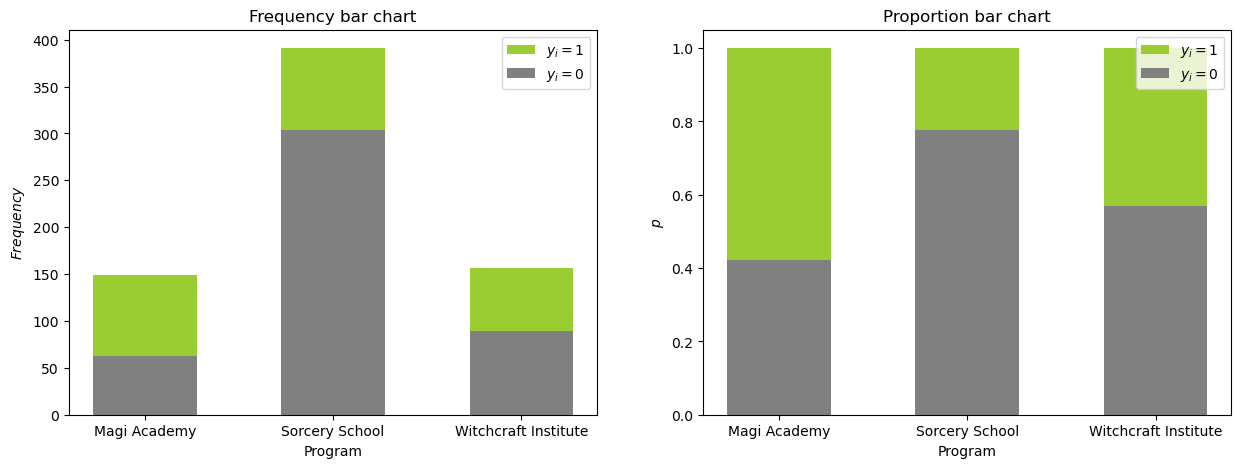

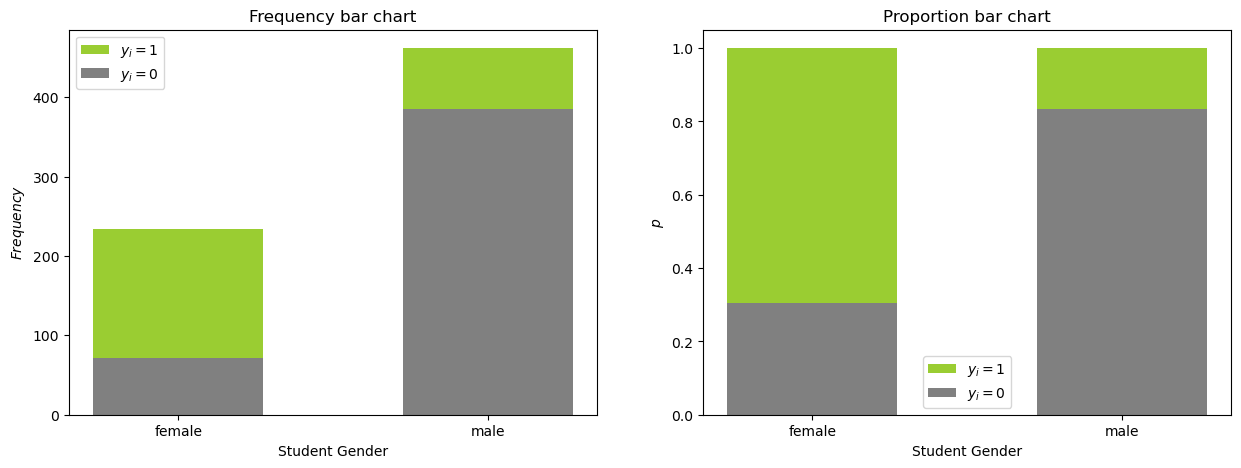

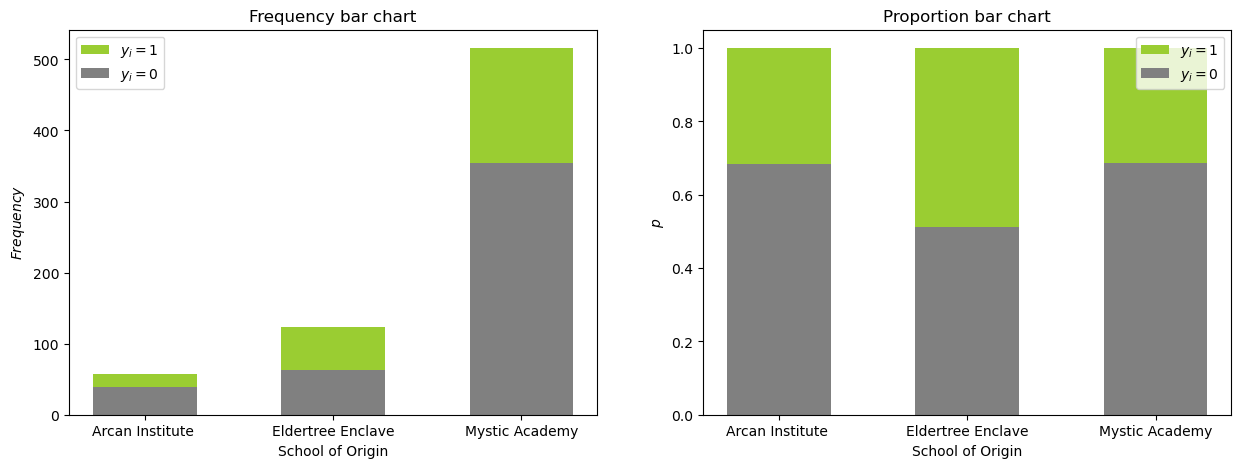

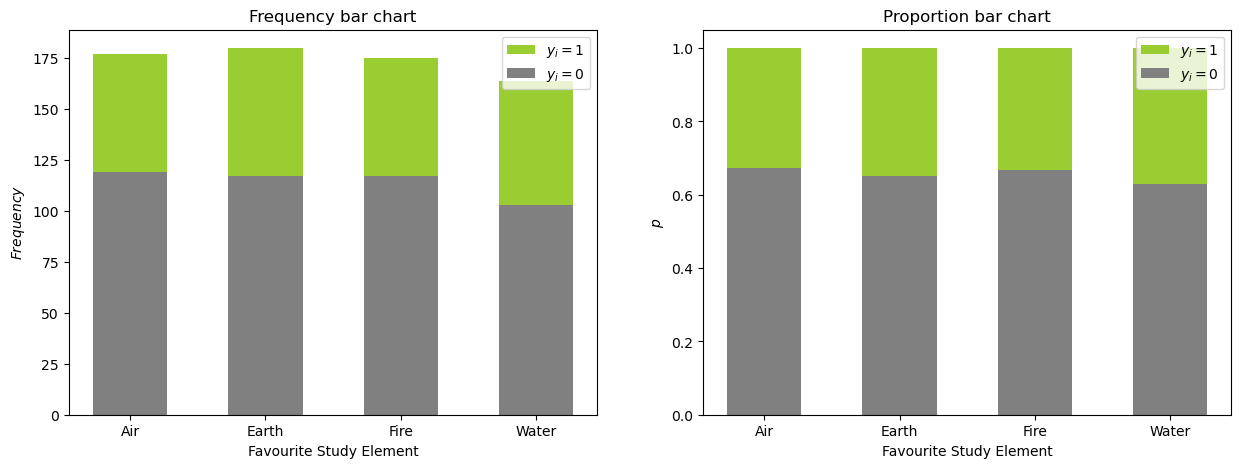

In [28]:
for var in data_categorical:
    bar_charts_categorical(data_categorical.join(target), var, "Admitted in School")

In [29]:
data_categorical.drop('Favourite Study Element', axis = 1, inplace = True)
train.drop('Favourite Study Element', axis = 1, inplace = True)
data.drop('Favourite Study Element', axis = 1, inplace = True)

We can conclude that the 'Favourite Study Element' variable is not a relevant predictor for our target variable, because looking at the graphs we can see the the frequencies of the different classes are nearly identical and the proportions of the target variable classes within in the classes of this variable are essentially the same. Additionally, the chi-squared test also tells this is the only variable which is not important for prediction. Thus it will be removed.

| Predictor | Chi-Square |
| --- | --- |
| Program | Keep |  
| Student Gender | Keep |
| School of Origin | Keep|
| Favourite Study Element | Discard |

# Encoding

In [30]:
# Transform the 'Gender' column in X_train
data['Male'] = data['Student Gender'].map({'male': 1, 'female': 0})

# Drop the original 'Gender' column
data = data.drop('Student Gender', axis=1)

# Display the result
data.head()

,Program,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Male
Student ID,,,,,,,,
1,Sorcery School,22.0,1,0,7.2500,Mystic Academy,18,1
2,Magi Academy,38.0,1,0,71.2833,Eldertree Enclave,7,0
3,Sorcery School,26.0,0,0,7.9250,Mystic Academy,12,0
5,Sorcery School,35.0,0,0,8.0500,Mystic Academy,12,1
6,Sorcery School,NaN,0,0,8.4583,Arcan Institute,11,1


In [31]:
#Creating dummy variables
data = pd.get_dummies(data, columns=['Program', 'School of Origin'], dtype=float)

#Dropping the last column (dummy variable) of each categorical value, because for those values, it corresponds to 0's in all of the others
data.drop('Program_Witchcraft Institute', axis=1, inplace=True)
data.drop('School of Origin_Mystic Academy', axis=1, inplace=True)
data.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
Student ID,,,,,,,,,,
1,22.0,1,0,7.2500,18,1,0.0,1.0,0.0,0.0
2,38.0,1,0,71.2833,7,0,1.0,0.0,0.0,1.0
3,26.0,0,0,7.9250,12,0,0.0,1.0,0.0,0.0
5,35.0,0,0,8.0500,12,1,0.0,1.0,0.0,0.0
6,NaN,0,0,8.4583,11,1,0.0,1.0,1.0,0.0


## Correlation

In [32]:
data_for_corr= data.join(target)
corr=data_for_corr.corr()
corr

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave,Admitted in School
Experience Level,1.000000,-0.299054,-0.261335,0.140431,0.030370,0.109161,0.381547,-0.355521,-0.046332,0.026334,-0.081669
Student Siblings,-0.299054,1.000000,0.465009,0.267540,0.006354,-0.183859,-0.061039,0.092528,0.001390,-0.041767,-0.003032
Student Family,-0.261335,0.465009,1.000000,0.239289,0.038833,-0.268108,-0.073995,0.029932,-0.088572,-0.016264,0.089104
Financial Background,0.140431,0.267540,0.239289,1.000000,-0.018551,-0.214519,0.680266,-0.484462,-0.124882,0.219077,0.293824
Student Social Influence,0.030370,0.006354,0.038833,-0.018551,1.000000,-0.030417,-0.025172,-0.017427,-0.012412,0.126689,0.016744
Male,0.109161,-0.183859,-0.268108,-0.214519,-0.030417,1.000000,-0.051200,0.088617,-0.053641,-0.076917,-0.526680
Program_Magi Academy,0.381547,-0.061039,-0.073995,0.680266,-0.025172,-0.051200,1.000000,-0.590933,-0.130330,0.254081,0.255135
Program_Sorcery School,-0.355521,0.092528,0.029932,-0.484462,-0.017427,0.088617,-0.590933,1.000000,0.232103,-0.114629,-0.291381
School of Origin_Arcan Institute,-0.046332,0.001390,-0.088572,-0.124882,-0.012412,-0.053641,-0.130330,0.232103,1.000000,-0.138376,-0.018246
School of Origin_Eldertree Enclave,0.026334,-0.041767,-0.016264,0.219077,0.126689,-0.076917,0.254081,-0.114629,-0.138376,1.000000,0.139368


In [33]:
def cor_heatmap(cor):
    mask = np.triu(np.ones_like(cor, dtype=bool))
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1',mask=mask, vmin = -1, vmax = 1)
    plt.show()

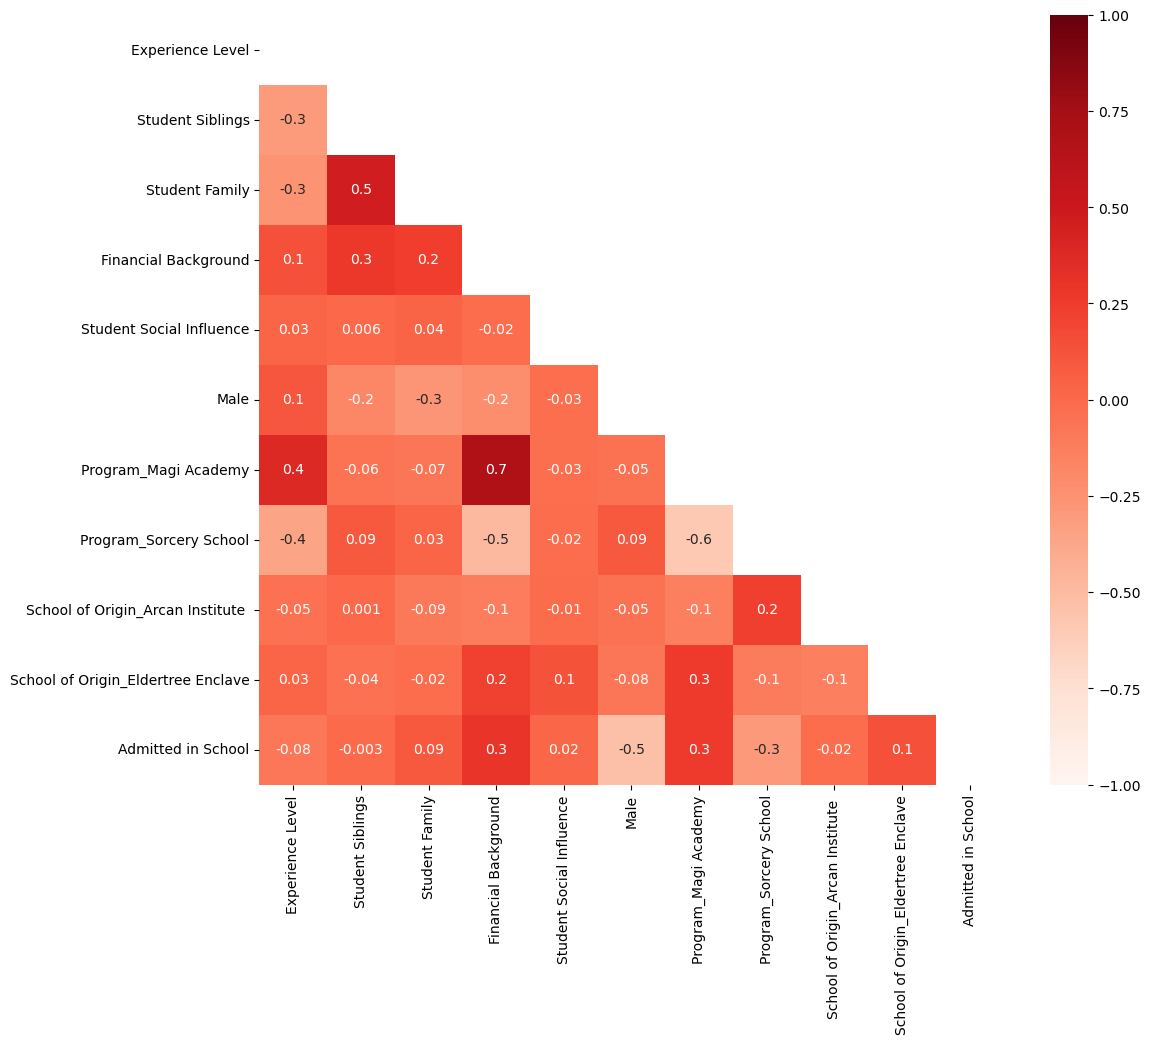

In [34]:
#Checking the correlation
cor_heatmap(corr)

The highest (positive or negative) correlation we have between variables is 0.7, thus we can say that none of our variables are highly correlated, as we only have one pair which is right on the threshold of being considered highly correlated.

In [35]:
#school of Origin Eldertree Enclave and school of Origin Mistic Academy have a correlation of -0.8 but Origin Mistic Academy was rejected in the dumyes (n-1columns)

In [36]:
#The correlation between 2 variables is never signifficantly high (bigger than 0.7 or lower than -0.7). Therefore, by now, we should keep all the variables.
#Moreover, we can see that there is no variable that is highly correlated with the target variable

# Splitting into train and validation

In [37]:
X_train, X_val, y_train, y_val = train_test_split(data,
                                                    target,
                                                    test_size = 0.2,
                                                  random_state = 22,
                                                  shuffle = True,
                                                 stratify = target
                                                   )
#strarufy for the imbalanced dataset, split of 80%for training and 20%for validation because our dataset is not so big.

In [38]:
X_train.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
Student ID,,,,,,,,,,
252,29.0,1,1,10.4625,21,0,0.0,1.0,0.0,0.0
678,18.0,0,0,9.8417,15,0,0.0,1.0,0.0,0.0
192,19.0,0,0,13.0000,18,1,0.0,0.0,0.0,0.0
741,NaN,0,0,30.0000,3,1,1.0,0.0,0.0,0.0
530,23.0,2,1,11.5000,20,1,0.0,0.0,0.0,0.0


# Imputing the Missing Values

In [39]:
#Inputing missing values
#cheking the best number of neighbors
neighbors_range = range(1, 21)
results = {}

for n_neighbors in range(1, 21):
    for weights in ['uniform', 'distance']:
        # Initialize the KNNImputer with the current number of neighbors
        knn_imputer = KNNImputer(n_neighbors=n_neighbors, weights=weights)

        # Fit and transform the training data
        X_train_imputed = knn_imputer.fit_transform(X_train)

        # Transform the testing data (using the imputer fitted on training data)
        X_val_imputed = knn_imputer.transform(X_val)

        # Initialize the model
        logistic_for_imputer = LogisticRegression()

        # Fit the model on the imputed training data
        logistic_for_imputer.fit(X_train_imputed, y_train)

        # Make predictions on the test set
        y_pred_log = logistic_for_imputer.predict(X_val_imputed)

        # Evaluate the performance using accuracy
        score1 = f1_score(y_val, y_pred_log)

        # Store the result in the dictionary
        results[(n_neighbors, weights)] = score1

# Find the optimal number of neighbors and weights with the maximum accuracy
optimal_params = max(results, key=results.get)

print(f"Optimal parameters: neighbors={optimal_params[0]}, weights='{optimal_params[1]}'")

Optimal parameters: neighbors=5, weights='uniform'


In [40]:
print(optimal_params)

(5, 'uniform')


In [41]:
# Now use the optimal parameters to impute missing values
optimal_n_neighbors, optimal_weights = optimal_params
inputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
X_train_filled_array = inputer.fit_transform(X_train)
X_val_filled_array = inputer.transform(X_val)

In [42]:
#Convert back to a dataframe
X_train = pd.DataFrame(X_train_filled_array, columns=X_train.columns)
X_val = pd.DataFrame(X_val_filled_array, columns=X_val.columns)

In [43]:
print(X_train.info())
print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Experience Level                    556 non-null    float64
 1   Student Siblings                    556 non-null    float64
 2   Student Family                      556 non-null    float64
 3   Financial Background                556 non-null    float64
 4   Student Social Influence            556 non-null    float64
 5   Male                                556 non-null    float64
 6   Program_Magi Academy                556 non-null    float64
 7   Program_Sorcery School              556 non-null    float64
 8   School of Origin_Arcan Institute    556 non-null    float64
 9   School of Origin_Eldertree Enclave  556 non-null    float64
dtypes: float64(10)
memory usage: 43.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 

In [44]:
#We don't have missing values anymore!

# Feature Scalling

In [45]:
#testing to find the best scaler

#standar 
st_scaler = StandardScaler().fit(X_train)
X_train_scl_st = st_scaler.transform(X_train)
X_train_scl_st = pd.DataFrame(X_train_scl_st, columns = X_train.columns).set_index(X_train.index)

X_val_scl_st = st_scaler.transform(X_val)
X_val_scl_st = pd.DataFrame(X_val_scl_st, columns = X_val.columns).set_index(X_val.index)

#minmax 0:1
mm_scaler = MinMaxScaler().fit(X_train)
X_train_scl_mm = mm_scaler.transform(X_train)
X_train_scl_mm = pd.DataFrame(X_train_scl_mm, columns = X_train.columns).set_index(X_train.index)

X_val_scl_mm = mm_scaler.transform(X_val)
X_val_scl_mm = pd.DataFrame(X_val_scl_mm, columns = X_val.columns)

#minmax -1:1
mm_scaler_range = MinMaxScaler(feature_range = (-1,1)).fit(X_train)
X_train_scl_mm_range = mm_scaler_range.transform(X_train)
X_train_scl_mm_range = pd.DataFrame(X_train_scl_mm_range, columns = X_train.columns).set_index(X_train.index)

X_val_scl_mm_range = mm_scaler_range.transform(X_val)
X_val_scl_mm_range = pd.DataFrame(X_val_scl_mm_range, columns = X_val.columns)

#robust scaler
rb_scaler = RobustScaler().fit(X_train)
X_train_scl_rb = rb_scaler.transform(X_train)
X_train_scl_rb = pd.DataFrame(X_train_scl_rb, columns = X_train.columns).set_index(X_train.index)

X_val_scl_rb = rb_scaler.transform(X_val)
X_val_scl_rb = pd.DataFrame(X_val_scl_rb, columns = X_val.columns).set_index(X_val.index)

### Modeling

In [46]:
#Create the instances
lr_st = LogisticRegression().fit(X_train_scl_st,y_train)
lr_mm = LogisticRegression().fit(X_train_scl_mm,y_train)
lr_mm_range = LogisticRegression().fit(X_train_scl_mm_range,y_train)
lr_rb = LogisticRegression().fit(X_train_scl_rb,y_train)
lr = LogisticRegression().fit(X_train,y_train)

In [47]:
#Note: we didn't even use the unscaled one:
#lr = LogisticRegression().fit(X_train,y_train),
#because it would result in a "Convergence Warning" which indicates that the optimization algorithm did not converge to a solution within the maximum number of iterations allowed

In [48]:
#predict the values of the target in each train datasetlr_pred = lr.predict(X_train)
lr_st_pred = lr_mm.predict(X_train_scl_st)
lr_mm_pred = lr_mm.predict(X_train_scl_mm)
lr_mm_range_pred = lr_mm_range.predict(X_train_scl_mm_range)
lr_rb_pred = lr_mm.predict(X_train_scl_rb)
lr_pred = lr.predict(X_train)

In [49]:
#predict the values of the target in each validation dataset
lr_st_pred_val = lr_st.predict(X_val_scl_st)
lr_mm_pred_val = lr_mm.predict(X_val_scl_mm)
lr_mm_range_pred_val = lr_mm_range.predict(X_val_scl_mm_range)
lr_rb_pred_val = lr_rb.predict(X_val_scl_rb)
lr_pred_val = lr.predict(X_val)

### Scores

In [50]:
#Training

print('       Logistic Regression in the Training dataset using Standard Scalar\n')
print(classification_report(y_train,lr_st_pred), '\n')

print('       Logistic Regression in the Training dataset using MinMax Scalar\n')
print(classification_report(y_train,lr_mm_pred), '\n')

print('       Logistic Regression in the Training dataset using MinMax Scalar with range(-1,1)\n')
print(classification_report(y_train,lr_mm_range_pred), '\n')

print('       Logistic Regression in the Training dataset using Robust Scalar\n')
print(classification_report(y_train,lr_rb_pred), '\n')

       Logistic Regression in the Training dataset using Standard Scalar

              precision    recall  f1-score   support

           0       0.91      0.48      0.63       364
           1       0.48      0.91      0.63       192

    accuracy                           0.63       556
   macro avg       0.70      0.69      0.63       556
weighted avg       0.76      0.63      0.63       556
 

       Logistic Regression in the Training dataset using MinMax Scalar

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       364
           1       0.79      0.69      0.74       192

    accuracy                           0.83       556
   macro avg       0.82      0.80      0.80       556
weighted avg       0.83      0.83      0.83       556
 

       Logistic Regression in the Training dataset using MinMax Scalar with range(-1,1)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       36

In [51]:
#Validation

print('       Logistic Regression in the Validation dataset using Standart Scalar\n')
print(classification_report(y_val,lr_st_pred_val), '\n')

print('       Logistic Regression in the Validation dataset using MinMax Scalar\n')
print(classification_report(y_val,lr_mm_pred_val), '\n')

print('       Logistic Regression in the Validation dataset using MinMax Scalar with range(-1,1)\n')
print(classification_report(y_val,lr_mm_range_pred_val), '\n')

print('       Logistic Regression in the Validation dataset using Robust Scalar\n')
print(classification_report(y_val,lr_rb_pred_val), '\n')

       Logistic Regression in the Validation dataset using Standart Scalar

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        92
           1       0.69      0.71      0.70        48

    accuracy                           0.79       140
   macro avg       0.77      0.77      0.77       140
weighted avg       0.79      0.79      0.79       140
 

       Logistic Regression in the Validation dataset using MinMax Scalar

              precision    recall  f1-score   support

           0       0.83      0.82      0.82        92
           1       0.66      0.69      0.67        48

    accuracy                           0.77       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.77      0.77      0.77       140
 

       Logistic Regression in the Validation dataset using MinMax Scalar with range(-1,1)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84   

In [52]:
#We choose MinMax with feature_range = (-1,1) for having higth scores in train and validation and low overfiting (compared to the others).

In [53]:
X_train_scl_mm_range.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
0,-0.281729,-0.5,-0.333333,-0.873079,0.739130,-1.0,-1.0,1.0,-1.0,-1.0
1,-0.558180,-1.0,-1.000000,-0.880610,0.217391,-1.0,-1.0,1.0,-1.0,-1.0
2,-0.533049,-1.0,-1.000000,-0.842297,0.478261,1.0,-1.0,-1.0,-1.0,-1.0
3,0.090224,-1.0,-1.000000,-0.636070,-0.826087,1.0,1.0,-1.0,-1.0,-1.0
4,-0.432521,0.0,-0.333333,-0.860493,0.652174,1.0,-1.0,-1.0,-1.0,-1.0


In [54]:
X_train_scl_mm_range.var()

Experience Level                      0.112984
Student Siblings                      0.191149
Student Family                        0.194731
Financial Background                  0.106788
Student Social Influence              0.355445
Male                                  0.884814
Program_Magi Academy                  0.665798
Program_Sorcery School                0.987686
School of Origin_Arcan Institute      0.304103
School of Origin_Eldertree Enclave    0.558157
dtype: float64

# Feature Selection

### Numerical variables: RFE

In [55]:
# Number of features
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 5)
high_score=0
# Variable to store the optimum features
nof=0
RFE_d = {}
#create the dictionary with the number of features between (1 and number of total columns)
for n in range(len(data_numerical.columns)):
    RFE_d[n+1]= []

#test using kfold
for train_index, test_index in cv.split(data_numerical, target):
    FSL_X_train, FSL_X_val = data_numerical.iloc[train_index], data_numerical.iloc[test_index]
    FSL_y_train, FSL_y_val = target.iloc[train_index], target.iloc[test_index]
    scaler = MinMaxScaler(feature_range = (-1,1))
    FSL_X_train_scl = scaler.fit_transform(FSL_X_train)
    FSL_X_val_scl = scaler.transform(FSL_X_val)
    FSL_X_train_scl_imp = inputer.fit_transform(FSL_X_train_scl)
    FSL_X_val_scl_imp = inputer.transform(FSL_X_val_scl)
    #test for every feature 
    for n in range(len(data_numerical.columns)):
        model = LogisticRegression()
        rfe = RFE(model,n_features_to_select = n+1)
        X_train_rfe = rfe.fit_transform(FSL_X_train_scl_imp, FSL_y_train)
        X_val_rfe = rfe.transform(FSL_X_val_scl_imp)
        model.fit(X_train_rfe,FSL_y_train)
        #save the score of the feature
        score = f1_score(FSL_y_val, model.predict(X_val_rfe))
        RFE_d[n+1].append(score)

#find the mean of the resulst and the best number of features
for n in range(len(data_numerical.columns)):
    RFE_d[n+1] = np.mean(RFE_d[n+1])
    if RFE_d[n+1] > high_score:
        high_score = RFE_d[n+1]
        nof = n+1

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.361675


In [56]:
RFE_d
#using 5 features we achive the best f1 score

{1: 0.3417794143785218,
 2: 0.33244091431352785,
 3: 0.35098385877815635,
 4: 0.3520165192907886,
 5: 0.3616751478609425}

In [57]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(FSL_X_train_scl_imp, FSL_y_train)

In [58]:
selected_features = pd.Series(rfe.support_, index = data_numerical.columns)
selected_features

Experience Level            True
Student Siblings            True
Student Family              True
Financial Background        True
Student Social Influence    True
dtype: bool

## LassoCV

In [59]:
pd.DataFrame(FSL_X_train_scl, columns = data_numerical.columns).var()

Experience Level            0.133565
Student Siblings            0.199881
Student Family              0.205256
Financial Background        0.103723
Student Social Influence    0.365032
dtype: float64

In [60]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [61]:
Lasso_df = pd.DataFrame(index = data_numerical.columns)
for train_index, test_index in cv.split(data_numerical, target):
    FSL_X_train, FSL_X_val = data_numerical.iloc[train_index], data_numerical.iloc[test_index]
    FSL_y_train, FSL_y_val = target.iloc[train_index], target.iloc[test_index]
    scaler = MinMaxScaler(feature_range = (-1,1))
    FSL_X_train_scl = scaler.fit_transform(FSL_X_train)
    FSL_X_val_scl = scaler.transform(FSL_X_val)
    FSL_X_train_scl_imp = inputer.fit_transform(FSL_X_train_scl)
    FSL_X_val_scl_imp = inputer.transform(FSL_X_val_scl)
    reg = LassoCV()
    reg.fit(FSL_X_train_scl_imp, FSL_y_train)
    Lasso_df = pd.concat([Lasso_df, pd.Series(reg.coef_, index = data_numerical.columns)], axis = 1)



In [62]:
coef = Lasso_df.T.mean()

In [63]:
coef == 0

Experience Level            False
Student Siblings            False
Student Family              False
Financial Background        False
Student Social Influence    False
dtype: bool

In [64]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 0 variables


In [65]:
coef.sort_values()

Experience Level           -0.187646
Student Siblings           -0.155877
Student Social Influence    0.018757
Student Family              0.034729
Financial Background        0.482428
dtype: float64

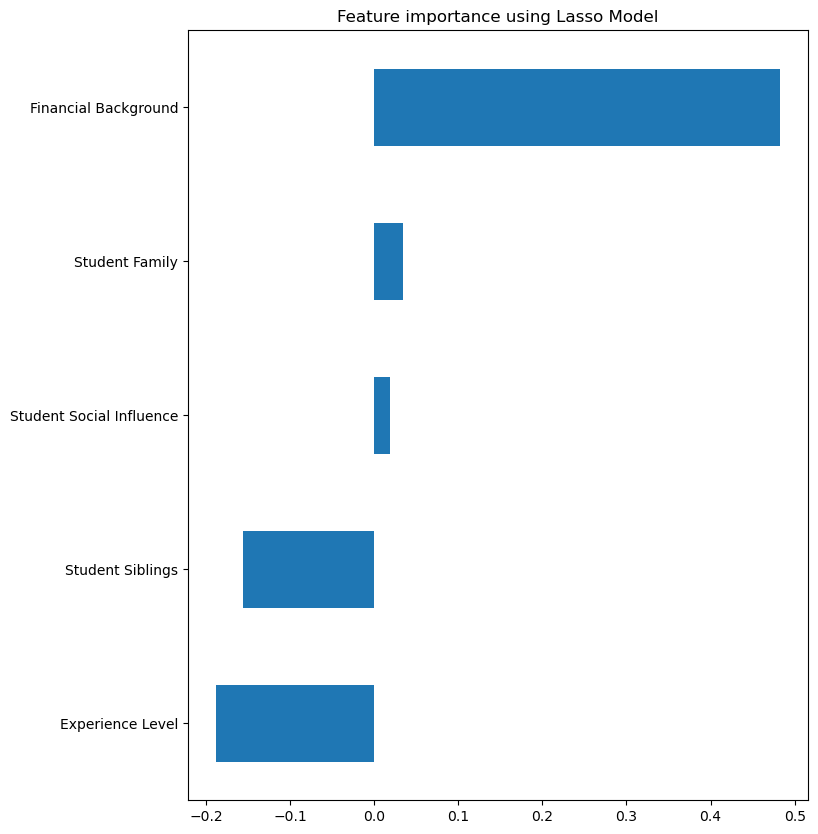

In [66]:
plot_importance(coef,'Lasso')

Looking at the results of the tests we performed for numerical feature selection, we believe that all numerical features are useful for prediction but since we have two features with low importance in the LassoCV test we will try with all features and we will also try with those features removed. We used RepeatedStratifiedKFold to ensure that the decision we made was based on multiple different splits of the dataset and not just a single one.


| Predictor | RFE | Lasso | What to do? (One possible way to "solve") |
| --- | --- | --- |--- |
| Experience Level  | Keep | Keep | Include in the model |
| Student Siblings | Keep | Keep | Include in the model |
| Student Social Influence | Keep | Keep ?| Try with and without |
| Student Family | Keep | Keep ? | Try with and without |
| Family_Size | Keep | Keep |  Include in the model |


# Datasets

Below is our dataset with feature selection performed which will be used going forward to the Modelling stage

In [67]:
selected_data = data_numerical.join([data_categorical, target])

In [68]:
selected_data

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Program,Student Gender,School of Origin,Admitted in School
Student ID,,,,,,,,,
1,22.0,1,0,7.2500,18,Sorcery School,male,Mystic Academy,0
2,38.0,1,0,71.2833,7,Magi Academy,female,Eldertree Enclave,1
3,26.0,0,0,7.9250,12,Sorcery School,female,Mystic Academy,1
5,35.0,0,0,8.0500,12,Sorcery School,male,Mystic Academy,0
6,NaN,0,0,8.4583,11,Sorcery School,male,Arcan Institute,0
...,...,...,...,...,...,...,...,...,...
883,22.0,0,0,10.5167,17,Sorcery School,female,Mystic Academy,0
884,28.0,0,0,10.5000,9,Witchcraft Institute,male,Mystic Academy,0
887,27.0,0,0,13.0000,8,Witchcraft Institute,male,Mystic Academy,0


In [69]:
#here we aply the necesary transformations to the data that we will use
X = selected_data.drop('Admitted in School', axis = 1)
X['Male'] = X['Student Gender'].map({'male': 1, 'female': 0})
X = X.drop('Student Gender', axis=1)
X = pd.get_dummies(X, columns=['Program', 'School of Origin'], dtype=float)
X.drop('Program_Witchcraft Institute', axis=1, inplace=True)
X.drop('School of Origin_Mystic Academy', axis=1, inplace=True)
X_testing = X.drop(['Student Social Influence', 'Student Family'], axis = 1) # X with 2 numerical features removed
y = selected_data['Admitted in School']

In [70]:
X_testing.head()

,Experience Level,Student Siblings,Financial Background,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
Student ID,,,,,,,,
1,22.0,1,7.2500,1,0.0,1.0,0.0,0.0
2,38.0,1,71.2833,0,1.0,0.0,0.0,1.0
3,26.0,0,7.9250,0,0.0,1.0,0.0,0.0
5,35.0,0,8.0500,1,0.0,1.0,0.0,0.0
6,NaN,0,8.4583,1,0.0,1.0,1.0,0.0


In [71]:
#we scale and fit the data that we will use to test our models 
X_scl = MinMaxScaler(feature_range = (-1,1)).fit_transform(X)
X_testing_scl = MinMaxScaler(feature_range = (-1,1)).fit_transform(X_testing)
inputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
X_scl_imp = inputer.fit_transform(X_scl)
X_testing_scl_imp = inputer.fit_transform(X_testing_scl)

We created the scaled and imputed datasets to use for our gridsearch methods, obviously there will be data leakage in these tests, but as we're only using them for comparison between hyperparameters we believe it won't be an issue because after selecting the best model we will do a cross validation without data leakage to optain a solid f1 score.

Also we created a dataset that doesnt have removal of observations, has the columns selected without the 2 numerical features like X_testing, and in the siblins colunm if the student has a siblin is 1 else is 0.

In [72]:
new = pd.read_csv('Project_train_dataset.csv')
new.set_index('Student ID', drop=True, inplace=True)

#0 no siblins, 1 has siblins
new.loc[new['Student Siblings'] > 1,'Student Siblings'] = 1
print(new['Student Siblings'].value_counts())

#selected featues
new = new[['Experience Level', 'Student Siblings',
       'Financial Background', 'Program',
       'Student Gender', 'School of Origin', 'Admitted in School']]

#output
new_y = new['Admitted in School']

#create dumyes
new = new.drop('Admitted in School', axis = 1)
new['Male'] = new['Student Gender'].map({'male': 1, 'female': 0})
new = new.drop('Student Gender', axis=1)
new = pd.get_dummies(new, columns=['Program', 'School of Origin'], dtype=float)
new.drop('Program_Witchcraft Institute', axis=1, inplace=True)
new.drop('School of Origin_Mystic Academy', axis=1, inplace=True)

#we scale and fit the data that we will use to test our models 
new_scl = MinMaxScaler(feature_range = (-1,1)).fit_transform(new)
inputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
new_scl_imp = inputer.fit_transform(new_scl)

new

Student Siblings
0    482
1    231
Name: count, dtype: int64


,Experience Level,Student Siblings,Financial Background,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
Student ID,,,,,,,,
1,22.0,1,7.2500,1,0.0,1.0,0.0,0.0
2,38.0,1,71.2833,0,1.0,0.0,0.0,1.0
3,26.0,0,7.9250,0,0.0,1.0,0.0,0.0
5,35.0,0,8.0500,1,0.0,1.0,0.0,0.0
6,NaN,0,8.4583,1,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
883,22.0,0,10.5167,0,0.0,1.0,0.0,0.0
884,28.0,0,10.5000,1,0.0,0.0,0.0,0.0
887,27.0,0,13.0000,1,0.0,0.0,0.0,0.0


# Modelling

## Function for cross validation

The function below will be used to test our models.

In [73]:
#X: features alreday selected and with dumies (not scaled not imputed)
#y: target
#method is kfold or rkfol

def avg_scores(method,X,y, model):
    #lists to append the scores
    f1_train = []
    f1_test = []
    #scaler previously selected
    scaler = MinMaxScaler(feature_range = (-1,1))
    #KNN imputer with best number of neiberhoods
    imputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
    #do the interaction for every k fold or repeted k fold
    for train_index, test_index in method.split(X,y):
        #split
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #scale
        X_train_scl = scaler.fit_transform(X_train)
        X_test_scl = scaler.transform(X_test)
        #impute
        X_train_scl_imp = imputer.fit_transform(X_train)
        X_test_scl_imp = imputer.transform(X_test)
        #fit and predict
        modelfit = model.fit(X_train_scl_imp, y_train)
        pred_train = modelfit.predict(X_train_scl_imp)
        pred_test = modelfit.predict(X_test_scl_imp)
        #calculate f1 and append
        f1_train.append(f1_score(y_train,pred_train))
        f1_test.append(f1_score(y_test,pred_test))
    #return the mean of f1
    print('Mean Train F1 Score:', np.mean(f1_train))
    print('Mean Validation F1 Score:', np.mean(f1_test))

In [74]:
skf = StratifiedKFold(n_splits = 7) # This is the cross-validation we will use for our GridSearchCV methods

## Logistic Regression

In [75]:
logr = LogisticRegression(random_state = 42)

In [76]:
# Scores with all numerical features
avg_scores(cv, X, y, logr)

Mean Train F1 Score: 0.7203383570710541
Mean Validation F1 Score: 0.7096273954782213


In [77]:
# Scores with two numerical features deleted
avg_scores(cv, X_testing, y, logr)

Mean Train F1 Score: 0.721728169468019
Mean Validation F1 Score: 0.7146655243966031


### Choosing the best parameters using Grid Search

In [78]:
parameter_space_logr = {
       'penalty':['l2'],        # Regularization term L2
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength
    'fit_intercept': [True, False],          # Whether to calculate the intercept
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in optimization
    'max_iter': [80, 100, 200, 300, 500],        # Maximum number of iterations
    'class_weight': [None, 'balanced'],     # Weights associated with classes (useful for imbalanced datasets)
    'random_state': [42],                   # Seed for reproducibility
}

In [79]:
logr1 = LogisticRegression()

In [80]:
gs_logr = GridSearchCV(logr1, parameter_space_logr, scoring='f1', cv = skf, n_jobs = -1)

In [81]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_logr.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [80, 100, 200, 300, 500],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [82]:
# Best parameters with all numerical features
gs_logr.best_params_

{'C': 10,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 80,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg'}

In [83]:
# Scores with all numerical features
logr_best = gs_logr.best_estimator_
avg_scores(cv, X, y, logr_best)

Mean Train F1 Score: 0.7217190249543571
Mean Validation F1 Score: 0.712069362436765


In [84]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_logr.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [80, 100, 200, 300, 500],
                         'penalty': ['l2'], 'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [85]:
# Best parameters with two numerical features deleted
gs_logr.best_params_

{'C': 100,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 80,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg'}

In [86]:
# Scores with two numerical features deleted
logr_best_testing = gs_logr.best_estimator_
avg_scores(cv, X_testing, y, logr_best_testing)

Mean Train F1 Score: 0.7248472512332469
Mean Validation F1 Score: 0.7193519604069504


In [87]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_logr.fit(new_scl_imp, new_y)
print(gs_logr.best_params_)
logr_best_new = gs_logr.best_estimator_
avg_scores(cv, new, new_y, logr_best_new)

{'C': 100, 'class_weight': None, 'fit_intercept': False, 'max_iter': 80, 'penalty': 'l2', 'random_state': 42, 'solver': 'newton-cg'}
Mean Train F1 Score: 0.6798227612637744
Mean Validation F1 Score: 0.6612945051923705


## Decision Tree

In [88]:
dt = DecisionTreeClassifier()

In [89]:
# Scores with all numerical features
avg_scores(cv, X, y, dt)

Mean Train F1 Score: 0.9997215777262182
Mean Validation F1 Score: 0.6493199468666617


In [90]:
# Scores with two numerical features deleted
avg_scores(cv, X_testing, y, dt)

Mean Train F1 Score: 0.9738641843503117
Mean Validation F1 Score: 0.6709243655830173


In [91]:
#An example of overfitting

### Postprunning the tree

In [92]:
dt_alpha = DecisionTreeClassifier(random_state=0)
path = dt_alpha.cost_complexity_pruning_path(X_train_scl_mm_range, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [93]:
trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_train_scl_mm_range, y_train)
    trees.append(dt_alpha)

train_scores = [tree.score(X_train_scl_mm_range, y_train) for tree in trees]
val_scores = [tree.score(X_val_scl_mm_range, y_val) for tree in trees]


node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.get_depth() for tree in trees]

index_best_model = np.argmax(val_scores)
best_model = trees[index_best_model]
# best_alpha = trees[index_best_model].
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_train_scl_mm_range, y_train))
print('Val accuracy of best model: ',best_model.score(X_val_scl_mm_range, y_val))

ccp_alpha of best model:  DecisionTreeClassifier(ccp_alpha=0.003209919868982874, random_state=0)
_____________________________________________________________
Training accuracy of best model:  0.9154676258992805
Val accuracy of best model:  0.8214285714285714


In [94]:
dt_ccp_alpha = DecisionTreeClassifier(ccp_alpha=0.003209919868982874).fit(X_train_scl_mm_range, y_train)

In [95]:
#scores
print(f'Accuracy score train: {accuracy_score(y_train,dt_ccp_alpha.predict(X_train_scl_mm_range))}')
print(f'Accuracy score val: {accuracy_score(y_val,dt_ccp_alpha.predict(X_val_scl_mm_range))}')
print(f'F1 score train: {f1_score(y_train,dt_ccp_alpha.predict(X_train_scl_mm_range))}')
print(f'F1 score val: {f1_score(y_val,dt_ccp_alpha.predict(X_val_scl_mm_range))}')

Accuracy score train: 0.9154676258992805
Accuracy score val: 0.8214285714285714
F1 score train: 0.8719346049046321
F1 score val: 0.7252747252747254


### Choosing the best parameters using Grid Search

In [96]:
parameter_space_dt = {
    'max_depth': [None, 2,3,4,5,6,7],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8, None],
    'max_leaf_nodes': [4,8,12, None],
    'ccp_alpha':[0,0.003209919868982874]
}

In [97]:
dt1 = DecisionTreeClassifier()

In [98]:
gs_dt = GridSearchCV(dt1, parameter_space_dt, scoring='f1', cv = skf, n_jobs = -1)

In [99]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_dt.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.003209919868982874],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'splitter': ['random', 'best']},
             scoring='f1')

In [100]:
# Best parameters with all numerical features
gs_dt.best_params_

{'ccp_alpha': 0.003209919868982874,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 6,
 'max_leaf_nodes': None,
 'splitter': 'best'}

In [101]:
# Scores with all numerical features
DT_best = gs_dt.best_estimator_
avg_scores(cv, X, y, DT_best)

Mean Train F1 Score: 0.804899022477468
Mean Validation F1 Score: 0.701136538610158


In [102]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_dt.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.003209919868982874],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'splitter': ['random', 'best']},
             scoring='f1')

In [103]:
# Best parameters with two numerical features deleted
gs_dt.best_params_

{'ccp_alpha': 0.003209919868982874,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'splitter': 'best'}

In [104]:
# Scores with two numerical features deleted
DT_best_testing = gs_dt.best_estimator_
avg_scores(cv, X_testing, y, DT_best_testing)

Mean Train F1 Score: 0.8006453979345942
Mean Validation F1 Score: 0.7067640137539659


In [105]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_dt.fit(new_scl_imp, new_y)
print(gs_dt.best_params_)
DT_best_new = gs_dt.best_estimator_
avg_scores(cv, new, new_y, DT_best_new)

{'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'max_leaf_nodes': 8, 'splitter': 'best'}
Mean Train F1 Score: 0.7416700019106962
Mean Validation F1 Score: 0.7161997221071909


## K Neirest Neighbours

In [106]:
knn = KNeighborsClassifier()

In [107]:
# Scores with all numerical features
avg_scores(cv, X, y, knn)

Mean Train F1 Score: 0.6629887221751172
Mean Validation F1 Score: 0.5193364950537958


In [108]:
# Scores with two numerical features deleted
avg_scores(cv, X_testing, y, knn)

Mean Train F1 Score: 0.6710215763054451
Mean Validation F1 Score: 0.5031040559674835


### Choosing the best number of neighbours

In [109]:
numberK_list=np.arange(1,21)
high_score=0
nof=0
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_scl_mm_range, y_train)
    score_train = f1_score(y_train, model.predict(X_train_scl_mm_range))
    score_val = f1_score(y_val, model.predict(X_val_scl_mm_range))
    score_list_train.append(score_train)
    score_list_val.append(score_val)

    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean F1 score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean F1 score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 10
Mean F1 score in train with 10 neighbors: 0.749263
Mean F1 score in validation with 10 neighbors: 0.690476


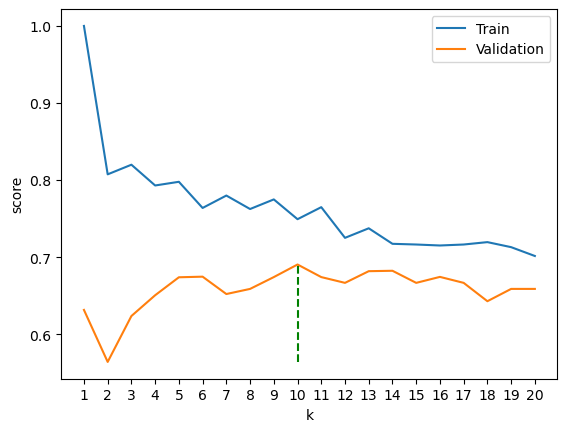

In [110]:

plt.plot(numberK_list, score_list_train, label='Train')
plt.plot(numberK_list, score_list_val, label = 'Validation')
plt.vlines(x=nof,ymax=high_score,ymin=min(score_list_val),ls='--',colors='g')
plt.xticks(numberK_list)
plt.xlabel('k')
plt.ylabel('score')
plt.legend()

plt.show()

In [111]:
# We could try with a KNeighborsClassifier(n_neighbors=3) but we will already do that in GridSearch

### Choosing the best parameters using Grid Search

In [112]:
parameter_space_knn = {
    'n_neighbors': [3, 5, 8, 9, 10,11],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 20, 30, 40, 50],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [113]:
gs_knn = GridSearchCV(knn, parameter_space_knn, scoring='f1', cv = skf, n_jobs = -1)

In [114]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_knn.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [115]:
# Best parameters with all numerical features
gs_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 8,
 'weights': 'distance'}

In [116]:
# Scores with all numerical features
knn_best = gs_knn.best_estimator_
avg_scores(cv, X, y, knn_best)

Mean Train F1 Score: 0.9997215777262182
Mean Validation F1 Score: 0.5124822051769471


In [117]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_knn.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [118]:
# Best parameters with two numerical features deleted
gs_knn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'chebyshev',
 'n_neighbors': 5,
 'weights': 'uniform'}

In [119]:
# Scores with two numerical features deleted
knn_best_testing = gs_knn.best_estimator_
avg_scores(cv, X_testing, y, knn_best_testing)

Mean Train F1 Score: 0.6466650257340615
Mean Validation F1 Score: 0.4869482240413701


In [120]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_knn.fit(new_scl_imp, new_y)
print(gs_knn.best_params_)
KNN_best_new = gs_knn.best_estimator_
avg_scores(cv, new, new_y, KNN_best_new)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Mean Train F1 Score: 0.9750087404829334
Mean Validation F1 Score: 0.5451803129551772


## Naive Bayes

In [121]:
#Note: Naive Bayes would work better if our data was Normally distributed (and some variables are not)

In [122]:
gnb = GaussianNB()

In [123]:
# Scores with all numerical features
avg_scores(cv, X, y, gnb)

Mean Train F1 Score: 0.6465543765720559
Mean Validation F1 Score: 0.638828640887863


In [124]:
# Scores with two numerical features deleted
avg_scores(cv, X_testing, y, gnb)

Mean Train F1 Score: 0.6568701426427623
Mean Validation F1 Score: 0.6447972612250585


In [125]:
#very bad scores
#we didnt use the grit search because MultinomialNB doesnt have much parameters

### Multinomial Naive Bayes

In [126]:
#The Multinomial Naive Bayes algorithm is designed for non-negative integer features
#and having negative values violates this assumption
#Therefore, for this model we will use our second best scalling method: MinMax (with range between 0 and 1)
def avg_scores_mnb(method,X,y, model):
    #lists to append the scors
    f1_train = []
    f1_test = []
    #scaler previously selected
    scaler = MinMaxScaler()
    #KNN imputer with best number of neiberhoods
    imputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
    #do the interaction for every k fold or repeted k fold
    for train_index, test_index in method.split(X,y):
        #split
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #scale
        X_train_scl = scaler.fit_transform(X_train)
        X_test_scl = scaler.transform(X_test)
        #impute
        X_train_scl_imp = imputer.fit_transform(X_train)
        X_test_scl_imp = imputer.transform(X_test)
        #fit and predict
        modelfit = model.fit(X_train_scl_imp, y_train)
        pred_train = modelfit.predict(X_train_scl_imp)
        pred_test = modelfit.predict(X_test_scl_imp)
        #calculate f1 and append
        f1_train.append(f1_score(y_train,pred_train))
        f1_test.append(f1_score(y_test,pred_test))
    #return the mean of f1
    print('Mean Train F1 Score:', np.mean(f1_train))
    print('Mean Validation F1 Score:', np.mean(f1_test))

In [127]:
mnb = MultinomialNB()

In [128]:
# Scores with all numerical features
avg_scores_mnb(cv, X, y, mnb)

Mean Train F1 Score: 0.5161709482260409
Mean Validation F1 Score: 0.5116384656857529


In [129]:
# Scores with two numerical features deleted
avg_scores_mnb(cv, X_testing, y, mnb)

Mean Train F1 Score: 0.5285784625837571
Mean Validation F1 Score: 0.5270415811386889


In [130]:
#terrible score
#we didnt use the gridsearch because MultinomialNB doesnt have much parameters

# Ensemble

## Bagging (Decision Tree Classifier, KNeighborsClassifier )

### Bagging Decision Tree

In [131]:
BaggingClassifier_dt = BaggingClassifier(base_estimator = DecisionTreeClassifier())

parameter_space_bagging = {
       'n_estimators': [5,10,25,50,100, 150],        # The number of base estimators in the ensemble.
   'max_samples': [0.2,0.4,0.8,1.0],    # The number of samples to draw from the train
    'max_features': [0.2,0.4,0.8,1.0],          # The number of features to draw from the train
    'bootstrap': [True, False],  # Whether samples are drawn with replacement.
   'bootstrap_features': [True, False],        # Whether features are drawn with replacement.
    'random_state': [42],                   # Seed for reproducibility
}

gs_bagging_dt = GridSearchCV(BaggingClassifier_dt, parameter_space_bagging, scoring='f1', n_jobs = -1, cv = skf)

In [132]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_dt.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [133]:
# Best parameters with all numerical features
gs_bagging_dt.best_params_

{'bootstrap': False,
 'bootstrap_features': True,
 'max_features': 1.0,
 'max_samples': 0.8,
 'n_estimators': 50,
 'random_state': 42}

In [134]:
# Scores with all numerical features
bagging_dt_best = gs_bagging_dt.best_estimator_
avg_scores(cv, X, y, bagging_dt_best)

Mean Train F1 Score: 0.9960919219700034
Mean Validation F1 Score: 0.7291630284978967


In [135]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_dt.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [136]:
# Best parameters with two numerical features deleted
gs_bagging_dt.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.2,
 'n_estimators': 100,
 'random_state': 42}

In [137]:
# Scores with two numerical features deleted
bagging_dt_best_testing = gs_bagging_dt.best_estimator_
avg_scores(cv, X_testing, y, bagging_dt_best_testing)

Mean Train F1 Score: 0.8212264883931177
Mean Validation F1 Score: 0.7272190564758158


In [138]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_bagging_dt.fit(new_scl_imp, new_y)
print(gs_bagging_dt.best_params_)
BAG_DT_best_new = gs_bagging_dt.best_estimator_
avg_scores(cv, new, new_y, BAG_DT_best_new)

{'bootstrap': False, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.4, 'n_estimators': 150, 'random_state': 42}
Mean Train F1 Score: 0.8941346030197329
Mean Validation F1 Score: 0.7523751882751836


### Bagging KNN

In [183]:
BaggingClassifier_knn = BaggingClassifier(base_estimator = KNeighborsClassifier())

gs_bagging_knn = GridSearchCV(BaggingClassifier_knn, parameter_space_bagging, scoring='f1', n_jobs = -1, cv = skf)

In [184]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_knn.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [185]:
# Best parameters with all numerical features
gs_bagging_knn.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 0.8,
 'n_estimators': 100,
 'random_state': 42}

In [186]:
# Scores with all numerical features
bagging_knn_best = gs_bagging_knn.best_estimator_
avg_scores(cv, X, y, bagging_knn_best)

Mean Train F1 Score: 0.6246264431039343
Mean Validation F1 Score: 0.5024776861712162


In [187]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_knn.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [188]:
# Best parameters with two numerical features deleted
gs_bagging_knn.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.8,
 'max_samples': 1.0,
 'n_estimators': 150,
 'random_state': 42}

In [189]:
# Scores with two numerical features deleted
bagging_knn_best_testing = gs_bagging_knn.best_estimator_
avg_scores(cv, X_testing, y, bagging_knn_best_testing)

Mean Train F1 Score: 0.7963492468394681
Mean Validation F1 Score: 0.5981711837730883


In [190]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_bagging_knn.fit(new_scl_imp, new_y)
print(gs_bagging_knn.best_params_)
BAG_KNN_best_new = gs_bagging_knn.best_estimator_
avg_scores(cv, new, new_y, BAG_KNN_best_new)

{'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 150, 'random_state': 42}
Mean Train F1 Score: 0.79565214714559
Mean Validation F1 Score: 0.5985147163516261


### Bagging Naive Bayes

In [147]:
#The Multinomial Naive Bayes algorithm is designed for non-negative integer features
#and having negative values violates this assumption
#Therefore, for this model we will use our second best scalling method to fit our gridsearch: MinMax (with range between 0 and 1)
X_scl_nb = MinMaxScaler().fit_transform(X)
X_testing_scl_nb = MinMaxScaler().fit_transform(X_testing)
inputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
X_scl_imp_nb = inputer.fit_transform(X_scl_nb)
X_testing_scl_imp_nb = inputer.fit_transform(X_testing_scl_nb)

In [148]:
BaggingClassifier_nb_mnb = BaggingClassifier()

nb_bagging = GaussianNB()
mnb_bagging = MultinomialNB()

parameter_space_bagging_nb = {
        'base_estimator' : [nb_bagging, mnb_bagging ],                      #The base estimator
       'n_estimators': [5,10,25,50,100, 150],        # The number of base estimators in the ensemble.
   'max_samples': [0.2,0.4,0.8,1.0],    # The number of samples to draw from the train
    'max_features': [0.2,0.4,0.8,1.0],          # The number of features to draw from the train
    'bootstrap': [True, False],  # Whether samples are drawn with replacement.
   'bootstrap_features': [True, False],        # Whether features are drawn with replacement.
    'random_state': [42],                   # Seed for reproducibility
}

gs_bagging_nb = GridSearchCV(BaggingClassifier_nb_mnb, parameter_space_bagging_nb, scoring='f1', n_jobs = -1, cv = skf)

### If the best base_estimator is GaussianNB, you can use avg_scores function

In [149]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_nb.fit(X_scl_imp_nb, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [GaussianNB(), MultinomialNB()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [150]:
# Best parameters with all numerical features
gs_bagging_nb.best_params_

{'base_estimator': GaussianNB(),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.4,
 'max_samples': 0.4,
 'n_estimators': 5,
 'random_state': 42}

In [151]:
# Scores with all numerical features
bagging_nb_best = gs_bagging_nb.best_estimator_
avg_scores_mnb(cv, X, y, bagging_nb_best)

Mean Train F1 Score: 0.6927438350176947
Mean Validation F1 Score: 0.6889204190382472


In [152]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_knn.fit(X_testing_scl_imp_nb, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.2, 0.4, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.8, 1.0],
                         'n_estimators': [5, 10, 25, 50, 100, 150],
                         'random_state': [42]},
             scoring='f1')

In [153]:
# Best parameters with two numerical features deleted
gs_bagging_nb.best_params_

{'base_estimator': GaussianNB(),
 'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.4,
 'max_samples': 0.4,
 'n_estimators': 5,
 'random_state': 42}

In [154]:
# Scores with two numerical features deleted
bagging_nb_best_testing = gs_bagging_nb.best_estimator_
avg_scores_mnb(cv, X_testing, y, bagging_nb_best_testing)

Mean Train F1 Score: 0.5404316140709762
Mean Validation F1 Score: 0.5386251577512144


## MLP Classifier

In [155]:
#pasar
#NN
modelNN = MLPClassifier()

#__Some rule of thumbs:__
#-	The number of hidden neurons should be between the size of the input layer and the size of the output layer
#-	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
#-	The number of hidden neurons should be less than twice the size of the input layer
#rules: between 1 and 19 neurons in total.

parameter_space_NN = {#number of neurons per layer
       'hidden_layer_sizes':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,(2,2), (2,2),(3,3),(4,4),(5,5),(6,6),(7,7),(8,8),(9,9),
                            (2,2,2),(3,3,3),(4,4,4),(5,5,5),(6,6,6),(2,2,2,2),(3,3,3,3),(4,4,4,4),(2,2,2,2,2),(3,3,3,3,3),(2,2,2,2,2,2),(3,3,3,3,3,3),
                            (2,2,2,2,2,2,2), (2,2,2,2,2,2,2,2), (2,2,2,2,2,2,2,2,2), (5,4,3,2), (5,5,4,3,2), (6,5,4,3), (7,6,5), (8,7), (9,8), (10,9),
                            (8,6,4), (8,4,2), (6,4,2), (8,4), (9,6,3), (9,6), (10,5), (10,5,3), (2,3,4,5), (2,3,4,5,5), (3,4,5,6), (5,6,7), (7,8),
                             (8,9), (9,10), (4,6,8), (2,4,6), (2,4,8), (4,8), (3,6,9), (6,9), (5,10), (3,5,10), (6,7,6), (5,9,5), (5,8,5), (5,7,5), (5,6,5),
                            (4,11,4), (4,10,4), (4,9,4), (4,8,4), (4,7,4), (4,6,4), (4,5,4), (4,5,5,4), (3,13,3), (3,12,3), (3,11,3), (3,10,3), (3,9,3), (3,8,3),
                             (3,7,3), (3,6,3), (3,5,3), (3,4,3), (3,4,5,4,3), (3,4,4,4,3), (2,15,2), (2,14,2), (2,13,2), (2,12,2), (2,11,2), (2,10,2),
                             (2,9,2), (2,8,2), (2,7,2), (2,6,2), (2,5,2), (2,4,2), (2,3,2), (2,3,3,2), (2,4,4,2), (2,5,5,2), (2,6,6,2), (2,7,7,2),
                            (2,3,9,3,2), (2,3,8,3,2), (2,3,7,3,2), (2,3,6,3,2), (2,3,5,3,2), (2,3,4,3,2), (2,3,3,3,2), (2,4,7,4,2), (2,4,6,4,2), (2,4,5,4,2),
                            (2,4,4,4,2), (2,5,5,5,2), (2,3,4,4,3,2)], #number of neurons per layer

    'max_iter' : [500 ,1000, 1500, 2000],    # Maximum number of iterations

   'activation' : ['identity', 'logistic', 'tanh', 'relu'],      #Activation function for the hidden layer. ‘identity’: no-op activation: returns f(x) = x
                                                                                        #‘logistic’ : logistic sigmoid function : f(x) = 1 / (1 + exp(-x))
                                                                                        #‘tanh’ : hyperbolic tan function :  f(x) = tanh(x)
                                                                                        #‘relu’ : rectified linear unit function: f(x) = max(0, x)
    
    'solver' : [ 'sgd', 'adam'],            #‘sgd’ refers to stochastic gradient descent.
                                            #‘adam’ refers to a stochastic gradient-based optimizer   (use momentum).
    
    
    'learning_rate_init' : [0.01, 0.001], #The initial learning rate used. 
    
    
    'learning_rate' : ['constant', 'invscaling'], 
        #‘constant’ is a constant learning rate given by ‘learning_rate_init’. ‘invscaling’ gradually 
        #decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. 
        #effective_learning_rate = learning_rate_init / pow(t, power_t)
    
    'shuffle' : [True, False], # Whether to shuffle samples in each iteration

    'random_state': [42],                   # Seed for reproducibility
                        }

grid_NN = GridSearchCV(modelNN, parameter_space_NN, scoring='f1', n_jobs = -1, cv = skf)

In [156]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
grid_NN.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18, 19,
                                                (2, 2), (2, 2), (3, 3), (4, 4),
                                                (5, 5), (6, 6), (7, 7), (8, 8),
                                                (9, 9), (2, 2, 2), (3, 3, 3),
                                                (4, 4, 4), ...],
                         'learning_rate': ['constant', 'invscaling'],
                         'learning_rate_init': [0.01, 0.001],
                         'max_iter': [500, 1000, 1500, 2000],
                         'random_state': [42], 'shuffle': [True, False],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [157]:
# Best parameters with all numerical features
grid_NN.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 19,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 500,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam'}

In [158]:
# Scores with all numerical features
nn_best = grid_NN.best_estimator_
avg_scores(cv, X, y, nn_best)

Mean Train F1 Score: 0.7238945613539788
Mean Validation F1 Score: 0.666250549858615


In [159]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
grid_NN.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                                12, 13, 14, 15, 16, 17, 18, 19,
                                                (2, 2), (2, 2), (3, 3), (4, 4),
                                                (5, 5), (6, 6), (7, 7), (8, 8),
                                                (9, 9), (2, 2, 2), (3, 3, 3),
                                                (4, 4, 4), ...],
                         'learning_rate': ['constant', 'invscaling'],
                         'learning_rate_init': [0.01, 0.001],
                         'max_iter': [500, 1000, 1500, 2000],
                         'random_state': [42], 'shuffle': [True, False],
                         'solver': ['sgd', 'adam']},
             scoring='f1')

In [160]:
# Best parameters with two numerical features deleted
grid_NN.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (5, 7, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 1000,
 'random_state': 42,
 'shuffle': False,
 'solver': 'adam'}

In [161]:
# Scores with two numerical features deleted
nn_best_testing = grid_NN.best_estimator_
avg_scores(cv, X_testing, y, nn_best_testing)

Mean Train F1 Score: 0.7259405923183989
Mean Validation F1 Score: 0.6917935604394221


In [162]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
grid_NN.fit(new_scl_imp, new_y) 
print(grid_NN.best_params_)  
NN_best_new = grid_NN.best_estimator_
avg_scores(cv, new, new_y, NN_best_new)

{'activation': 'relu', 'hidden_layer_sizes': (5, 6, 7), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'random_state': 42, 'shuffle': True, 'solver': 'adam'}
Mean Train F1 Score: 0.7093463774449558
Mean Validation F1 Score: 0.6804631866275156


## Random Forest

In [163]:
rf = RandomForestClassifier(random_state = 22)
parameter_space_rf = {'n_estimators': [5,10,25,50,100, 150],
    'max_depth': [None, 2,3,4,5,6,7],
    'criterion': ['gini', 'entropy'],
    'max_features': [2,4,6,8, None],
    'max_leaf_nodes': [4,8,12, None],
    'ccp_alpha':[0,0.003209919868982874]
}
gs_bagging_rf = GridSearchCV(rf, parameter_space_rf, scoring='f1', n_jobs = -1, cv = skf)

In [164]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_rf.fit(X_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.003209919868982874],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'n_estimators': [5, 10, 25, 50, 100, 150]},
             scoring='f1')

In [165]:
# Best parameters with all numerical features
gs_bagging_rf.best_params_

{'ccp_alpha': 0,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 8,
 'max_leaf_nodes': None,
 'n_estimators': 50}

In [166]:
# Scores with all numerical features
rf_best = gs_bagging_rf.best_estimator_
avg_scores(cv, X, y, rf_best)

Mean Train F1 Score: 0.8891936491255125
Mean Validation F1 Score: 0.7220637186108584


In [167]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_rf.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'ccp_alpha': [0, 0.003209919868982874],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 4, 6, 8, None],
                         'max_leaf_nodes': [4, 8, 12, None],
                         'n_estimators': [5, 10, 25, 50, 100, 150]},
             scoring='f1')

In [168]:
# Best parameters with two numerical features deleted
gs_bagging_rf.best_params_

{'ccp_alpha': 0.003209919868982874,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'max_leaf_nodes': None,
 'n_estimators': 10}

In [169]:
# Scores with two numerical features deleted
rf_best_testing = gs_bagging_rf.best_estimator_
avg_scores(cv, X_testing, y, rf_best_testing)

Mean Train F1 Score: 0.8294608456805475
Mean Validation F1 Score: 0.725358798457854


In [170]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_bagging_rf.fit(new_scl_imp, new_y)
print(gs_bagging_rf.best_params_)
RF_best_new = gs_bagging_rf.best_estimator_
avg_scores(cv, new, new_y, RF_best_new)

{'ccp_alpha': 0.003209919868982874, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'max_leaf_nodes': None, 'n_estimators': 100}
Mean Train F1 Score: 0.8532273603311292
Mean Validation F1 Score: 0.7470482835974346


## Boosting (AdaBoostClassifier, GradientBoostingClassifier)

### Gradient Boosting

In [171]:
#GRADIENDT BOOSTING
gb = GradientBoostingClassifier(random_state=22)
parameter_space_gb = {'n_estimators': [5, 10, 25, 50, 100, 150], 
    'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'loss' : ['log_loss', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_features': [2,4,6,8, None],
    'max_leaf_nodes': [4,8,12, None],
    'ccp_alpha':[0,0.003209919868982874],
    'max_depth': [None, 2,3,4,5,6,7]
}

gs_bagging_gb = GridSearchCV(gb, parameter_space_gb, scoring='f1', n_jobs = -1, cv = skf)

In [172]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_gb.fit(X_scl_imp, y)
# Best parameters with all numerical features
gs_bagging_gb.best_params_

{'ccp_alpha': 0.003209919868982874,
 'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': 8,
 'max_leaf_nodes': None,
 'n_estimators': 10}

In [173]:
# Scores with all numerical features
gb_best = gs_bagging_gb.best_estimator_
avg_scores(cv, X, y, gb_best)

Mean Train F1 Score: 0.8851444611638851
Mean Validation F1 Score: 0.7193499051195


In [174]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_gb.fit(X_testing_scl_imp, y)
# Best parameters with two numerical features deleted
gs_bagging_gb.best_params_

{'ccp_alpha': 0,
 'criterion': 'squared_error',
 'learning_rate': 1,
 'loss': 'exponential',
 'max_depth': 7,
 'max_features': 6,
 'max_leaf_nodes': 12,
 'n_estimators': 10}

In [175]:
# Scores with two numerical features deleted
gb_best_testing = gs_bagging_gb.best_estimator_
avg_scores(cv, X_testing, y, gb_best_testing)

Mean Train F1 Score: 0.8724560307553253
Mean Validation F1 Score: 0.7206487921524152


In [176]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_bagging_gb.fit(new_scl_imp, new_y)
print(gs_bagging_gb.best_params_)
GRADI_best_new = gs_bagging_gb.best_estimator_
avg_scores(cv, new, new_y, GRADI_best_new)

{'ccp_alpha': 0, 'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'max_features': 6, 'max_leaf_nodes': 8, 'n_estimators': 150}
Mean Train F1 Score: 0.8751115844241791
Mean Validation F1 Score: 0.7387618669451169


### AdaBoost

In [177]:
#ADA BOOSTING
ab = AdaBoostClassifier(random_state = 22)
parameter_space_ab = {'n_estimators': [5,10,25,50,100, 150],
                     'estimator' : [None, DecisionTreeClassifier(random_state=22), LogisticRegression(random_state=22),
                                   KNeighborsClassifier(), GaussianNB()],
                     'learning_rate' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
                     'algorithm' : ['SAMME', 'SAMME.R']}
gs_bagging_ab = GridSearchCV(ab, parameter_space_ab, scoring='f1', n_jobs = -1, cv = skf)

In [178]:
# Testing GridSearchCV with all numerical features (the full dataset as we have cross-validation)
gs_bagging_ab.fit(X_scl_imp, y)
# Best parameters with all numerical features
gs_bagging_ab.best_params_

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1,
 'n_estimators': 150}

In [179]:
# Scores with all numerical features
ab_best = gs_bagging_ab.best_estimator_
avg_scores(cv, X, y, ab_best)

Mean Train F1 Score: 0.8011076318477857
Mean Validation F1 Score: 0.7029384795347109


In [180]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_bagging_ab.fit(X_testing_scl_imp, y)
# Best parameters with two numerical features deleted
gs_bagging_ab.best_params_

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 0.5,
 'n_estimators': 150}

In [181]:
# Scores with two numerical features deleted
ab_best_testing = gs_bagging_ab.best_estimator_
avg_scores(cv, X_testing, y, ab_best_testing)

Mean Train F1 Score: 0.7789975956605454
Mean Validation F1 Score: 0.714858882592788


In [182]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_bagging_ab.fit(new_scl_imp, new_y)
print(gs_bagging_ab.best_params_)
ADABOOST_best_new = gs_bagging_ab.best_estimator_
avg_scores(cv, new, new_y, ADABOOST_best_new)

{'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1, 'n_estimators': 150}
Mean Train F1 Score: 0.8098885097171103
Mean Validation F1 Score: 0.7232019146480746


## Stacking

We will only uses the models that achive a F1 score > 0.7 in validation in our stakings.

In [191]:
parameter_space_staking = {
      
    'final_estimator' : [None, DecisionTreeClassifier(random_state = 22), MLPClassifier(random_state = 22), 
                         RandomForestClassifier(random_state = 22),
                        GradientBoostingClassifier(random_state=22), AdaBoostClassifier(random_state=22), 
                         AdaBoostClassifier(estimator = LogisticRegression(random_state=22), random_state=22), 
                         AdaBoostClassifier(estimator = KNeighborsClassifier(), random_state=22),
                        AdaBoostClassifier(estimator =  GaussianNB(), random_state=22)],  #final estimators/metalearner

    'stack_method' : ['auto', 'predict_proba'], 
                        #if ‘auto’, it will try to invoke, for each estimator, 'predict_proba', 
                        #'decision_function' or 'predict' in that order. otherwise, 'predict_proba'.
        
    'passthrough' : [True, False] # When False, only the predictions of estimators will be used as 
                                        #training data for final_estimator. When True, the final_estimator is 
                                        #trained on the predictions as well as the original training data.
                        }

In [192]:
#The best models with the test dataset without the 2 numerical features (X_testing)
#STAKING ALL THE BEST MODELS
all_models = StackingClassifier(estimators = [('LR', LogisticRegression(C = 100, fit_intercept = True, max_iter = 80,
                penalty = 'l2' , random_state = 42, solver = 'newton-cg')) , ('DT',DecisionTreeClassifier(ccp_alpha = 0.003209919868982874,
                 criterion = 'gini', max_features = 8, splitter ='best')) , 
                ('B_DT',BaggingClassifier(base_estimator = DecisionTreeClassifier(), bootstrap = False, bootstrap_features =False,
                 max_features = 1.0, max_samples = 0.2, n_estimators = 100, random_state = 42)) , 
                ('RF', RandomForestClassifier(ccp_alpha = 0.003209919868982874, criterion = 'gini', max_features = 4,
                 n_estimators = 10)), ('ADA', AdaBoostClassifier(random_state = 22, algorithm = 'SAMME.R',
                 learning_rate = 0.5, n_estimators = 150)), ('GBOOST', GradientBoostingClassifier(random_state=22,
                ccp_alpha = 0, criterion = 'squared_error', learning_rate = 1, loss = 'exponential', max_depth = 7,
                 max_features = 6, max_leaf_nodes = 12, n_estimators= 10))])

gs_staking_all = GridSearchCV(all_models, parameter_space_staking, scoring='f1', n_jobs = -1, cv = skf)

In [193]:
# Testing GridSearchCV with two numerical features removed (the full dataset as we have cross-validation)
gs_staking_all.fit(X_testing_scl_imp, y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=StackingClassifier(estimators=[('LR',
                                                       LogisticRegression(C=100,
                                                                          max_iter=80,
                                                                          random_state=42,
                                                                          solver='newton-cg')),
                                                      ('DT',
                                                       DecisionTreeClassifier(ccp_alpha=0.003209919868982874,
                                                                              max_features=8)),
                                                      ('B_DT',
                                                       BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                                         bootstrap=...
                                             GradientBoostingClassifier(random_state=22),
                                             AdaBoostClassifier(random_state=22),
                                             AdaBoostClassifier(estimator=LogisticRegression(random_state=22),
                                                                random_state=22),
                                             AdaBoostClassifier(estimator=KNeighborsClassifier(),
                                                                random_state=22),
                                             AdaBoostClassifier(estimator=GaussianNB(),
                                                                random_state=22)],
                         'passthrough': [True, False],
                         'stack_method': ['auto', 'predict_proba']},
             scoring='f1')

In [194]:
# Best parameters with two numerical features deleted
gs_staking_all.best_params_

{'final_estimator': None, 'passthrough': True, 'stack_method': 'predict_proba'}

In [195]:
# Scores with two numerical features deleted
st_best_testing = gs_staking_all.best_estimator_
avg_scores(cv, X_testing, y, st_best_testing)

Mean Train F1 Score: 0.8249809295435158
Mean Validation F1 Score: 0.7336496388949193


In [198]:
#The best models with the test dataset without the 2 numerical features, siblins 0-1, and no removal of outlier
#'new' dataset
#STAKING ALL THE BEST MODELS
all_models_new = StackingClassifier(estimators = [('DT',DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy', 
                max_depth = None, max_features = 6, max_leaf_nodes = 8, splitter = 'best')) , 
                ('B_DT',BaggingClassifier(base_estimator = DecisionTreeClassifier(),bootstrap = False, bootstrap_features = False,
                max_features = 1.0, max_samples = 0.4, n_estimators = 150, random_state = 42)), 
                ('RF', RandomForestClassifier(random_state = 22, ccp_alpha = 0.003209919868982874, criterion = 'gini', 
                max_features = 8, n_estimators = 100)), ('ADA', AdaBoostClassifier(random_state = 22, algorithm = 'SAMME.R', 
                estimator = None, learning_rate = 1, n_estimators = 150)), 
                ('GBOOST', GradientBoostingClassifier(random_state=22, ccp_alpha =0, criterion = 'friedman_mse', 
                learning_rate = 0.1, loss = 'exponential', max_depth = 3, max_features = 6, max_leaf_nodes = 8, n_estimators = 150 ))])

gs_staking_all_new = GridSearchCV(all_models_new, parameter_space_staking, scoring='f1', n_jobs = -1, cv = skf)

In [199]:
# Scores with two numerical features deleted, using siblins 0-1 and no removal of outliers
gs_staking_all_new.fit(new_scl_imp, new_y)
print(gs_staking_all_new.best_params_)
STACK_best_new = gs_staking_all_new.best_estimator_
avg_scores(cv, new, new_y, STACK_best_new)

{'final_estimator': AdaBoostClassifier(estimator=LogisticRegression(random_state=22),
                   random_state=22), 'passthrough': False, 'stack_method': 'predict_proba'}
Mean Train F1 Score: 0.8626800566601748
Mean Validation F1 Score: 0.7458864442921105


# Predicting for the Test dataset

## Feature ingeniering 

In [73]:
test.drop(['School Dormitory', 'Student Social Influence', 'Student Family'], axis = 1, inplace = True)

In [74]:
test.drop(['Favourite Study Element'], axis = 1, inplace = True)

In [75]:
test.set_index('Student ID', inplace = True)
test

,Program,Student Gender,Experience Level,Student Siblings,Financial Background,School of Origin
Student ID,,,,,,
836,Magi Academy,female,39.0,1,83.1583,Eldertree Enclave
323,Witchcraft Institute,female,30.0,0,12.3500,Arcan Institute
117,Sorcery School,male,70.5,0,7.7500,Arcan Institute
444,Witchcraft Institute,female,28.0,0,13.0000,Mystic Academy
619,Witchcraft Institute,female,4.0,2,39.0000,Mystic Academy
...,...,...,...,...,...,...
21,Witchcraft Institute,male,35.0,0,26.0000,Mystic Academy
366,Sorcery School,male,30.0,0,7.2500,Mystic Academy
890,Magi Academy,male,26.0,0,30.0000,Eldertree Enclave


In [76]:
# for models that uses 'X_testing'
test['Male'] = test['Student Gender'].map({'male': 1, 'female': 0})
test = test.drop('Student Gender', axis=1)
test = pd.get_dummies(test, columns=['Program', 'School of Origin'], dtype=float)
test.drop('Program_Witchcraft Institute', axis=1, inplace=True)
test.drop('School of Origin_Mystic Academy', axis=1, inplace=True)

test.loc[test['Student Siblings'] > 3,'Student Siblings'] = 3

# for models that uses 'new'
test_new = test.copy()
test_new.loc[test_new['Student Siblings'] > 1,'Student Siblings'] = 1

In [77]:
test

,Experience Level,Student Siblings,Financial Background,Male,Program_Magi Academy,Program_Sorcery School,School of Origin_Arcan Institute,School of Origin_Eldertree Enclave
Student ID,,,,,,,,
836,39.0,1,83.1583,0,1.0,0.0,0.0,1.0
323,30.0,0,12.3500,0,0.0,0.0,1.0,0.0
117,70.5,0,7.7500,1,0.0,1.0,1.0,0.0
444,28.0,0,13.0000,0,0.0,0.0,0.0,0.0
619,4.0,2,39.0000,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21,35.0,0,26.0000,1,0.0,0.0,0.0,0.0
366,30.0,0,7.2500,1,0.0,1.0,0.0,0.0
890,26.0,0,30.0000,1,1.0,0.0,0.0,1.0


In [78]:
scaler = MinMaxScaler(feature_range = (-1,1)).fit(X_testing)
f_X_testing_scl = scaler.transform(X_testing)
test_scl = scaler.transform(test)

imputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
f_X_testing_scl_imp = imputer.fit_transform(f_X_testing_scl)
test_scl_imp = imputer.transform(test_scl)
test_scl_imp

array([[-0.03040965, -0.5       ,  0.00879438, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.25659713, -1.        , -0.850182  , ..., -1.        ,
         1.        , -1.        ],
       [ 0.76124654, -1.        , -0.90598465, ...,  1.        ,
         1.        , -1.        ],
       ...,
       [-0.35712491, -1.        , -0.63606962, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.5330485 , -0.5       , -0.35584324, ..., -1.        ,
        -1.        , -1.        ],
       [-0.48278462, -1.        , -0.89769553, ...,  1.        ,
        -1.        , -1.        ]])

In [79]:
scaler1 = MinMaxScaler(feature_range = (-1,1)).fit(new)
f_X_new_scl = scaler1.transform(new)
test_scl_new = scaler1.transform(test_new)

imputer = KNNImputer(n_neighbors=optimal_n_neighbors, weights=optimal_weights)
f_X_new_scl_imp = imputer.fit_transform(f_X_new_scl)
test_scl_imp_new = imputer.transform(test_scl_new)
test_scl_imp_new

array([[-0.03040965,  1.        , -0.67537162, ..., -1.        ,
        -1.        ,  1.        ],
       [-0.25659713, -1.        , -0.95178881, ..., -1.        ,
         1.        , -1.        ],
       [ 0.76124654, -1.        , -0.96974601, ...,  1.        ,
         1.        , -1.        ],
       ...,
       [-0.35712491, -1.        , -0.8828878 , ..., -1.        ,
        -1.        ,  1.        ],
       [-0.5330485 ,  1.        , -0.79271141, ..., -1.        ,
        -1.        , -1.        ],
       [-0.48278462, -1.        , -0.96707859, ...,  1.        ,
        -1.        , -1.        ]])

#### Chosen model

In [80]:
model =RandomForestClassifier(random_state = 22, ccp_alpha = 0.003209919868982874, criterion = 'gini', 
                max_features = 8, n_estimators = 100)

model_fited =  model.fit(new_scl_imp, new_y)
prediction = model_fited.predict(test_scl_imp_new)
final = pd.DataFrame(prediction, index = test.index, columns = ['Prediction'])
final.to_csv('prediction_RF_new.csv')
final['Prediction'].value_counts()
#kagle 0.82352

Prediction
0    112
1     64
Name: count, dtype: int64

In [81]:
model =StackingClassifier(estimators = [('LR', LogisticRegression(C = 100, fit_intercept = True, max_iter = 80,
                penalty = 'l2' , random_state = 42, solver = 'newton-cg')) , ('DT',DecisionTreeClassifier(ccp_alpha = 0.003209919868982874,
                 criterion = 'gini', max_features = 8, splitter ='best')) , 
                ('B_DT',BaggingClassifier(base_estimator = DecisionTreeClassifier(), bootstrap = False, bootstrap_features =False,
                 max_features = 1.0, max_samples = 0.2, n_estimators = 100, random_state = 42)) , 
                ('RF', RandomForestClassifier(ccp_alpha = 0.003209919868982874, criterion = 'gini', max_features = 4,
                 n_estimators = 10)), ('ADA', AdaBoostClassifier(random_state = 22, algorithm = 'SAMME.R',
                 learning_rate = 0.5, n_estimators = 150)), ('GBOOST', GradientBoostingClassifier(random_state=22,
                ccp_alpha = 0, criterion = 'squared_error', learning_rate = 1, loss = 'exponential', max_depth = 7,
                 max_features = 6, max_leaf_nodes = 12, n_estimators= 10))], final_estimator = None, passthrough = True, 
                stack_method ='predict_proba')

model_fited =  model.fit(f_X_testing_scl_imp, y)
prediction = model_fited.predict(test_scl_imp)
final = pd.DataFrame(prediction, index = test.index, columns = ['Prediction'])
final.to_csv('prediction_stack_testing.csv')
final['Prediction'].value_counts()
#kagle 0.77777

Prediction
0    111
1     65
Name: count, dtype: int64

In [82]:
model =StackingClassifier(estimators = [('DT',DecisionTreeClassifier(ccp_alpha = 0, criterion = 'entropy', 
                max_depth = None, max_features = 6, max_leaf_nodes = 8, splitter = 'best')) , 
                ('B_DT',BaggingClassifier(base_estimator = DecisionTreeClassifier(),bootstrap = False, bootstrap_features = False,
                max_features = 1.0, max_samples = 0.4, n_estimators = 150, random_state = 42)), 
                ('RF', RandomForestClassifier(random_state = 22, ccp_alpha = 0, criterion = 'gini', 
                max_features = 8, n_estimators = 100)), ('ADA', AdaBoostClassifier(random_state = 22, algorithm = 'SAMME.R', 
                estimator = None, learning_rate = 1, n_estimators = 150)), 
                ('GBOOST', GradientBoostingClassifier(random_state=22, ccp_alpha =0, criterion = 'friedman_mse', 
                learning_rate = 0.1, loss = 'exponential', max_depth = 3, max_features = 6, max_leaf_nodes = 8, n_estimators = 150 ))],
                final_estimator = MLPClassifier(random_state=22), passthrough = False, stack_method = 'auto')

model_fited =  model.fit(new_scl_imp, new_y)
prediction = model_fited.predict(test_scl_imp_new)
final = pd.DataFrame(prediction, index = test.index, columns = ['Prediction'])
final.to_csv('prediction_stack_new.csv')
final['Prediction'].value_counts()
#kagle 0.82352

Prediction
0    112
1     64
Name: count, dtype: int64

# Final model

We chose to use the random forest using the dataset ‘new’ as final model because it was the one that give us the best result in the F1 score of the validation datasets when we were testing it with the avg_scores function, and because it has the lower overfitting among the best models (F1 score in train =0.8523 and Validation = 0.7532); to be sure we tested putting our prediction of the different best models in kaggle and we achieve the same score in the best models that we found (we know that the score seen in kaggle is only 17 observations), since all scores in kaggle were the same we chose the random forest for its simplicity of complexity, also because it require less time when training the model and because it is simpler to interpret the results obtained compared over the stackings.

In [83]:
model_final =RandomForestClassifier(random_state = 22, ccp_alpha = 0.003209919868982874, criterion = 'gini', 
                max_features = 8, n_estimators = 100)

model_fited =  model_final.fit(new_scl_imp, new_y)
prediction = model_fited.predict(test_scl_imp_new)
final = pd.DataFrame(prediction, index = test.index, columns = ['Prediction'])
final.to_csv('prediction_final_model.csv')
final['Prediction'].value_counts()

Prediction
0    112
1     64
Name: count, dtype: int64

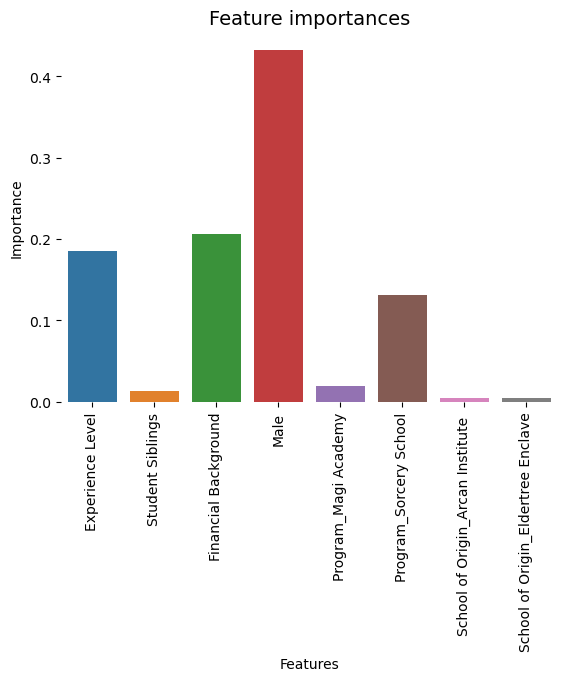

In [101]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : list(new.columns), 
                               "importances" : model_final.feature_importances_})
                             
# Plotting bar chart, g is from graph
fig = sns.barplot(x=importances_df["feature_names"], 
                y=importances_df["importances"])
fig.set_title("Feature importances", fontsize=14)
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.set(xlabel='Features', ylabel='Importance')
plt.show()